<a href="https://colab.research.google.com/github/Yohannes-ejigu/GIM-TEC-read-and-plot-from-CDDIS/blob/main/stormMarch2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q condacolab
import condacolab
condacolab.install()
!mamba install pygmt

In [ ]:
!pip install xarray
!pip install cdflib
!pip install cdasws
!pip install cartopy
!pip install viresclient
!python -m pip install cmcrameri

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/My Drive/
!unzip TEC_Data.zip

[Errno 2] No such file or directory: '/content/drive/My Drive/'
/content
unzip:  cannot find or open TEC_Data.zip, TEC_Data.zip.zip or TEC_Data.zip.ZIP.


In [ ]:
import pandas as pd

sites = ['areq','bake','bele','chpi','chur','falk','ibec','mtv2','picl','pwro','riop','roa0','sant','sccf','sgp3','topl','vces']
days=['22','23','24']

for site in sites:
  i=0
  TEC_Dis = pd.DataFrame()
  for doy in ['81','82','83']:
    Tec = pd.read_csv('/content/drive/MyDrive/TEC_Data/'+doy+'/'+site+'0'+doy+'-2023-03-'+days[i]+'.Cmn',delim_whitespace=True, header=2)
    TEC_Dis = pd.concat((TEC_Dis, Tec))  # Corrected the concatenation syntax
    i += 1

  TEC_Dis = TEC_Dis.sort_values(by=['MJdatet'])
  TEC_Dis['Datetime'] = pd.to_datetime(TEC_Dis['MJdatet'], unit='D', origin='1858-11-17')
  TEC_Dis.plot(x='Datetime',y='Vtec' )
  #TEC_Dis.to_csv('/content/drive/MyDrive/TEC_Data/TEC_Dis_'+site+'.csv', index=False)


In [ ]:

TEC_Dis

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

sites = ['areq','bake','bele','chpi','chur','falk','ibec','mtv2','picl','pwro','riop','roa0','sant','sccf','sgp3','topl','vces']
days=['22','23','24']

# Define the number of rows and columns for subplots
num_rows = (len(sites) + 2) // 3  # Adding 2 for rounding up
num_cols = 2

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))

for i, site in enumerate(sites):
    row = i // num_cols
    col = i % num_cols

    TEC_Dis = pd.DataFrame()
    for j, doy in enumerate(['81','82','83']):
        Tec = pd.read_csv('/content/drive/MyDrive/TEC_Data/'+doy+'/'+site+'0'+doy+'-2023-03-'+days[j]+'.Cmn', delim_whitespace=True, header=2)
        TEC_Dis = pd.concat((TEC_Dis, Tec))  # Corrected the concatenation syntax

    TEC_Dis = TEC_Dis.sort_values(by=['MJdatet'])
    TEC_Dis['Datetime'] = pd.to_datetime(TEC_Dis['MJdatet'], unit='D', origin='1858-11-17')

    TEC_Dis.plot(x='Datetime', y='Vtec', ax=axes[row, col])
    axes[row, col].set_title(site)
    axes[row, col].set_xlabel('Datetime')
    axes[row, col].set_ylabel('Vtec')

# Hide empty subplots if necessary
for i in range(len(sites), num_rows * num_cols):
    row = i // num_cols
    col = i % num_cols
    fig.delaxes(axes[row, col])

plt.tight_layout()
plt.show()



In [2]:
import os

# Set the CDF_LIB environment variable
os.environ["CDF_LIB"] = "/usr/local/lib/python3.10/dist-packages"

# Now import cdflib
import cdflib

from cdasws import CdasWs
from cdasws.datarepresentation import DataRepresentation
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter, HourLocator, DayLocator
import matplotlib.dates as mdates

cdas = CdasWs()

import xarray as xr
import datetime as dt
from cdasws import CdasWs
from cdasws.datarepresentation import DataRepresentation as dr
# from spacepy import pycdf
import cartopy.crs as ccrs
import cartopy.feature as cfeature
#import proplot as pplt
#import pygmt


#pygmt.show_versions()

In [3]:
from viresclient import set_token
set_token("https://vires.services/ows", set_default=True)
from viresclient import SwarmRequest
import datetime as dt
import matplotlib.pyplot as plt

request = SwarmRequest()
#GAuzpjyWJH7w1jBK2kYM-Zn7FlVdGSgd

Setting access token for https://vires.services/ows  ...
Generate a token at https://vires.services/accounts/tokens/
Enter token:··········
Token saved for https://vires.services/ows


In [ ]:
fig = pygmt.Figure()
fig.coast(projection="H10c", region="g", frame=True, land="gray")
fig.show()



NameError: name 'pygmt' is not defined

In [ ]:
vars = ['tecUQRM3','tecUQRMovie','rmsUQRM','tecUQRM1','tecUQRM1movie','tecUQRM2','tecUQRM2movie','UQRnumStations','UQRnumSatellites']
time = ['2015-03-15T00:00:00.000Z', '2015-03-18T23:45:00.000Z']
status, data_15minTEC = cdas.get_data('GPS_TEC15MIN_IGS', vars, time[0], time[1], dataRepresentation = dr.XARRAY)

/usr/local/lib/python3.10/site-packages/cdflib/xarray/cdf_to_xarray.py:619: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  created_vars[var_name] = xr.Variable(var_dims, var_data, attrs=var_atts)  # type: ignore[no-untyped-call]


In [ ]:
vars = ['tecUQRM3','tecUQRMovie','rmsUQRM','tecUQRM1','tecUQRM1movie','tecUQRM2','tecUQRM2movie','UQRnumStations','UQRnumSatellites']
time = ['2024-04-08T00:00:00.000Z', '2024-04-08T23:45:00.000Z']
status, data_15minTEC = cdas.get_data('GPS_TEC15MIN_IGS', vars, time[0], time[1], dataRepresentation = dr.XARRAY)

/usr/local/lib/python3.10/site-packages/cdflib/xarray/cdf_to_xarray.py:619: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  created_vars[var_name] = xr.Variable(var_dims, var_data, attrs=var_atts)  # type: ignore[no-untyped-call]


In [ ]:
data_15minTEC#['tecUQR'].plot()

<xarray.Dataset> Size: 18MB
Dimensions:           (Epoch: 96, lat: 71, lon: 73)
Coordinates:
  * Epoch             (Epoch) datetime64[ns] 768B 2024-04-08 ... 2024-04-08T2...
  * lat               (lat) float32 284B 87.5 85.0 82.5 ... -82.5 -85.0 -87.5
  * lon               (lon) float32 292B -180.0 -175.0 -170.0 ... 175.0 180.0
Data variables:
    tecUQRM3          (Epoch, lat, lon) float32 2MB 13.7 13.7 13.7 ... 13.4 13.6
    tecUQRMovie       (Epoch, lat, lon) float32 2MB 13.7 13.7 13.7 ... 13.4 13.6
    rmsUQRM           (Epoch, lat, lon) float32 2MB 4.3 3.8 3.7 ... 10.8 11.0
    tecUQRM1          (Epoch, lat, lon) float32 2MB 13.7 13.7 13.7 ... 13.4 13.6
    tecUQRM1movie     (Epoch, lat, lon) float32 2MB 13.7 13.7 13.7 ... 13.4 13.6
    tecUQRM2          (Epoch, lat, lon) float32 2MB 13.7 13.7 13.7 ... 13.4 13.6
    tecUQRM2movie     (Epoch, lat, lon) float32 2MB 13.7 13.7 13.7 ... 13.4 13.6
    UQRnumStations    (Epoch) int16 192B 232 232 232 232 232 ... 232 232 232 232
    UQRnumSatellites  (Epoch) int16 192B 38 38 38 38 38 38 ... 38 38 38 38 38 38
    tecUQR            (Epoch, lat, lon) float32 2MB 13.7 13.7 13.7 ... 13.4 13.6
    rmsUQR            (Epoch, lat, lon) float32 2MB 4.3 3.8 3.7 ... 10.8 11.0
Attributes: (12/20)
    TITLE:                        ['GPS total electron content 15minute maps']
    Project:                      ['GPS>Global Positioning System']
    Source_name:                  ['GPS>Global Positioning System']
    Discipline:                   ['Space Physics>Magnetospheric  Ionospheric...
    Descriptor:                   ['tec15min> Total Electron Content 15minute']
    Data_type:                    ['IGS>Intern. GPS Service']
    ...                           ...
    LINK_TEXT:                    ['CDDIS ftp archive:', 'JPL-GPS-TEC:', 'Mov...
    LINK_TITLE:                   ['IGS IONO files in IONEX format', 'Real-ti...
    HTTP_LINK:                    ['https://cddis.nasa.gov/Data_and_Derived_P...
    Cdawlib_idl_row_notranspose:  ['FALSE']
    spase_DatasetResourceID:      ['spase://NASA/NumericalData/IGS/GPS_Receiv...
    CDAWEB_PARENTS:               ['gps_tec15min_igs_00000000_v01', 'gps_tec1...

In [ ]:
r = "rinex_org/aats0010.19o"
print(r[-12:-8])

aats


In [ ]:
sites = ["AATS", "HAAJ", "HALV", "HETT", "IMA2", "IVAO", "JOE2", "JUOP", "JYV2", "KAJJ", "KEV2", "KIV2", "KOL2", "KRIK", "KUU2", "LOV3", "MAAN", "MET3", "MIK3", "NUR2", "OLK2", "OLOS", "ORIV", "OUL2", "PIEM", "PYHA", "RAAS", "RAN2", "ROM2", "ROV2", "SAVU", "SLIN", "SOD3", "SUOS", "TORN", "TUO2", "VAA2", "VIR2"]
sites[1].lower()

'haaj'

In [ ]:
obs=''

**bold text**

In [ ]:
request.set_collection("SW_OPER_EFIA_LP_1B")
request.set_products(
    measurements=['U_orbit',
                 'Ne',
                 'Ne_error',
                 'Te',
                 'Te_error',
                 'Vs',
                 'Vs_error',
                 'Flags_LP',
                 'Flags_Ne',
                 'Flags_Te',
                 'Flags_Vs']
)
data = request.get_between(
    dt.datetime(2023,3,22),
    dt.datetime(2023,3,25)
)

Processing:  100%|██████████|  [ Elapsed: 00:03, Remaining: 00:00 ] [1/1] 
Downloading: 100%|██████████|  [ Elapsed: 00:03, Remaining: 00:00 ] (48.196MB)


In [ ]:
df = data.as_dataframe()
df.head()

NameError: name 'data' is not defined

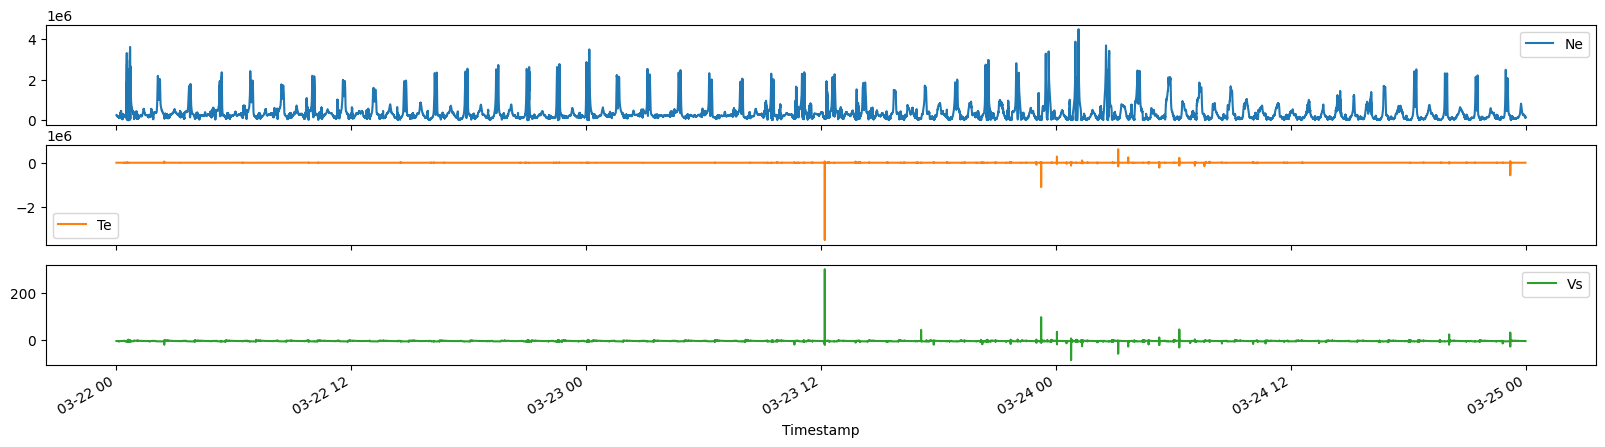

In [ ]:
df.plot(y=["Ne", "Te", "Vs"], subplots=True, figsize=(20,5));

In [6]:
request.set_collection("SW_OPER_IPDAIRR_2F")
request.set_products(measurements=request.available_measurements("IPD"))
data_A = request.get_between(
    dt.datetime(2023,3,2),
    dt.datetime(2023,3,25)
)
request.set_collection("SW_OPER_IPDBIRR_2F")
request.set_products(measurements=request.available_measurements("IPD"))
data_B = request.get_between(
    dt.datetime(2023,3,2),
    dt.datetime(2023,3,25)
)
request.set_collection("SW_OPER_IPDCIRR_2F")
request.set_products(measurements=request.available_measurements("IPD"))
data_C = request.get_between(
    dt.datetime(2023,3,2),
    dt.datetime(2023,3,25)
)

Processing:  100%|██████████|  [ Elapsed: 00:05, Remaining: 00:00 ] [1/1] 
Downloading: 100%|██████████|  [ Elapsed: 00:20, Remaining: 00:00 ] (415.359MB)
Processing:  100%|██████████|  [ Elapsed: 00:04, Remaining: 00:00 ] [1/1] 
Downloading: 100%|██████████|  [ Elapsed: 00:20, Remaining: 00:00 ] (415.359MB)
Processing:  100%|██████████|  [ Elapsed: 00:04, Remaining: 00:00 ] [1/1] 
Downloading: 100%|██████████|  [ Elapsed: 00:20, Remaining: 00:00 ] (415.359MB)


In [7]:
df_A = data_A.as_dataframe()
df_B = data_B.as_dataframe()
df_C = data_C.as_dataframe()

In [8]:
df_A['smoothed1h_mVTEC'] = df_A['mVTEC'].rolling(window='1h').mean()
df_B['smoothed1h_mVTEC'] = df_B['mVTEC'].rolling(window='1h').mean()
df_C['smoothed1h_mVTEC'] = df_C['mVTEC'].rolling(window='1h').mean()

In [ ]:
df.columns

Index(['IPIR_index', 'IBI_flag', 'RODI20s', 'Spacecraft', 'mVTEC',
       'Grad_Ne_at_100km', 'ROD', 'Latitude', 'Radius', 'delta_Ne20s',
       'Background_Ne', 'mROTI10s', 'TEC_STD', 'Te', 'Foreground_Ne',
       'delta_Ne10s', 'RODI10s', 'Grad_Ne_at_50km', 'Ionosphere_region_flag',
       'Longitude', 'Grad_Ne_at_PCP_edge', 'mROT', 'Ne', 'delta_Ne40s',
       'Ne_quality_flag', 'mROTI20s', 'Grad_Ne_at_20km', 'Num_GPS_satellites',
       'PCP_flag'],
      dtype='object')

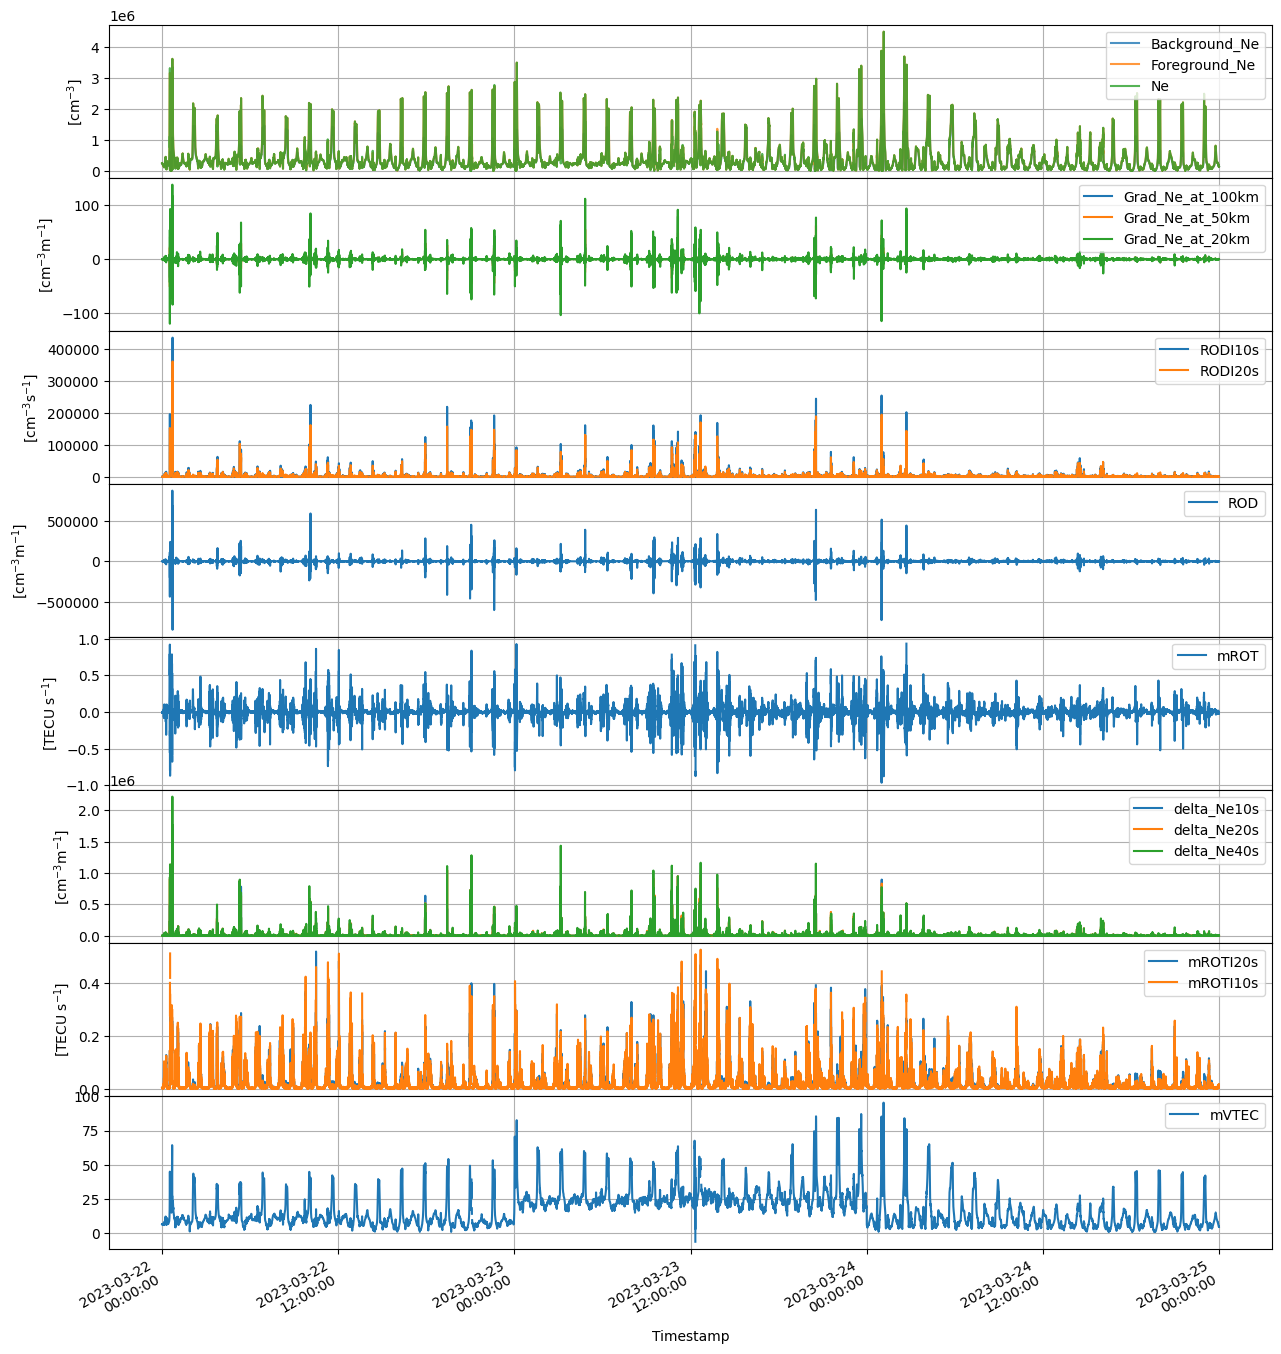

In [ ]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

fig, axes = plt.subplots(nrows=8, ncols=1, figsize=(15,18), sharex=True)
df_A.plot(ax=axes[0], y=['Background_Ne', 'Foreground_Ne', 'Ne'], alpha=0.8)
df_A.plot(ax=axes[1], y=['Grad_Ne_at_100km', 'Grad_Ne_at_50km', 'Grad_Ne_at_20km'])
df_A.plot(ax=axes[2], y=['RODI10s', 'RODI20s'])
df_A.plot(ax=axes[3], y=['ROD'])
df_A.plot(ax=axes[4], y=['mROT'])
df_A.plot(ax=axes[5], y=['delta_Ne10s', 'delta_Ne20s', 'delta_Ne40s'])
df_A.plot(ax=axes[6], y=['mROTI20s', 'mROTI10s'])
df_A.plot(ax=axes[7], y=['mVTEC'])
axes[0].set_ylabel("[cm$^{-3}$]")
axes[1].set_ylabel("[cm$^{-3}$m$^{-1}$]")
axes[2].set_ylabel("[cm$^{-3}$s$^{-1}$]")
axes[3].set_ylabel("[cm$^{-3}$m$^{-1}$]")
axes[4].set_ylabel("[TECU s$^{-1}$]")
axes[5].set_ylabel("[cm$^{-3}$m$^{-1}$]")
axes[6].set_ylabel("[TECU s$^{-1}$]")
axes[6].set_xlabel("Timestamp")

for ax in axes:
    # Reformat time axis
    # https://www.earthdatascience.org/courses/earth-analytics-python/use-time-series-data-in-python/customize-dates--matplotlib-plots-python/
    ax.xaxis.set_major_formatter(DateFormatter("%Y-%m-%d\n%H:%M:%S"))
    ax.legend(loc="upper right")
    ax.grid()
fig.subplots_adjust(hspace=0)

<ipython-input-9-e1c1ef4c314c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff['Ne'] = dff['Ne']/10**6
<ipython-input-9-e1c1ef4c314c>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff[ 'delta_Ne40s'] = dff[ 'delta_Ne40s']/10**6


KeyError: "None of [Index(['smoothed2h_mVTEC'], dtype='object')] are in the [columns]"

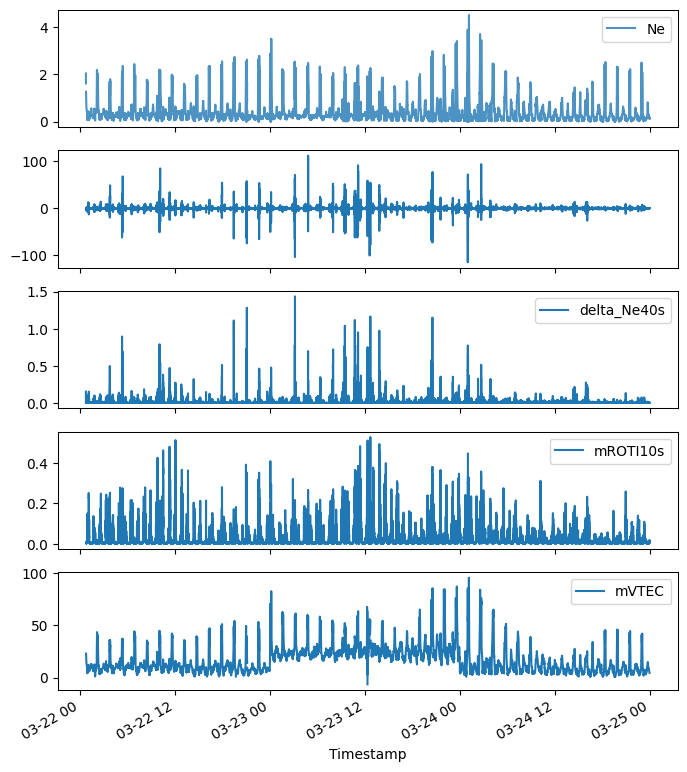

In [ ]:

plt.rcParams.update({'font.size': 10})
plt.rcParams["axes.linewidth"] = 0.75

dff = df_A['2023-03-22 00:43:00':]
dff['Ne'] = dff['Ne']/10**6
dff[ 'delta_Ne40s'] = dff[ 'delta_Ne40s']/10**6
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(8,10), sharex=True)
dff.plot(ax=axes[0], y=['Ne'], alpha=0.8)
dff.plot(ax=axes[1], y=[ 'Grad_Ne_at_20km'], legend=False)
dff.plot(ax=axes[2], y=["delta_Ne40s"])
dff.plot(ax=axes[3], y=['mROTI10s'])
dff.plot(ax=axes[4], y=['mVTEC'])
dff.plot(ax=axes[4], y=['smoothed2h_mVTEC'])
axes[0].set_ylabel("[10$^{6}$.cm$^{-3}$]")
axes[1].set_ylabel("[cm$^{-3}$m$^{-1}$]")
axes[2].set_ylabel("[cm$^{-3}$m$^{-1}$]")
axes[3].set_ylabel("[TECU s$^{-1}$]")
axes[4].set_xlabel("Timestamp")
axes[0].set_ylim(-0.2, 4);
axes[4].set_ylim(-0.5, 98);
legs = ['Ne',r'$\nabla Ne@20km$', '$\Delta$Ne','mROTI','mVTEC']
i=0
for ax in axes:
    # Reformat time axis
    # https://www.earthdatascience.org/courses/earth-analytics-python/use-time-series-data-in-python/customize-dates--matplotlib-plots-python/

    leg = legs[i]
    print(leg)
    ax.legend([leg], loc="upper right")
    ax.grid()
    i += 1
# Set major x-axis formatter for day-month and minor formatter for hour-minute
major_date_format = DateFormatter('%H:%M\n%d-%b')  # Newline followed by day-month (e.g., '\n18-Apr')
minor_date_format = DateFormatter('%H:%M')    # Hour-minute format

plt.gca().xaxis.set_major_formatter(major_date_format)
plt.gca().xaxis.set_minor_formatter(minor_date_format)

# Set locators for major and minor ticks
plt.gca().xaxis.set_major_locator(DayLocator())
plt.gca().xaxis.set_minor_locator(HourLocator(12))

plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
fig.subplots_adjust(hspace=0)

In [ ]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter, HourLocator, DayLocator

plt.rcParams.update({'font.size': 10})
plt.rcParams["axes.linewidth"] = 0.75

dff = df_A['2023-03-22 00:43:00':]
dff['Ne'] = dff['Ne']/10**6
dff[ 'delta_Ne40s'] = dff[ 'delta_Ne40s']/10**6

df1_13 = df_A.loc['2023-03-13']
df2_13 = df_A.loc['2023-03-13']
df3_13 = df_A.loc['2023-03-13']
df1_13.index = df1_13.index + timedelta(days=9)
df2_13.index = df2_13.index + timedelta(days=10)
df3_13.index = df3_13.index + timedelta(days=11)
df_13 = pd.concat([df1_13,df1_13,df3_13])
df_13.index = df_13.index.strftime('%Y-%m-%d %H:%M:%S')
dff.index = dff.index.strftime('%Y-%m-%d %H:%M:%S')
df_13 = df_13[~df_13.index.duplicated()]
dff['dVTEC'] = dff['mVTEC'] - df_13['mVTEC'] # dff['smoothed1h_mVTEC']- dff['2023-03-24 00:00:00':]['smoothed1h_mVTEC'].mean()
dff['dVTEC%'] = dff['dVTEC']*100/((dff[:'2023-03-22 23:58:00']['smoothed1h_mVTEC'].mean() + dff['2023-03-24 00:00:00':]['smoothed1h_mVTEC'].mean())/2)
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(10,8), sharex=True, sharey='row')

dff.plot(ax=axes[0,0], y=['mVTEC'])
dff.plot(ax=axes[0,0], y=['smoothed1h_mVTEC'])
dff.plot(ax=axes[1,0], y=["dVTEC"])
dff.plot(ax=axes[2,0], y=['mROTI10s'])
dff.plot(ax=axes[3,0], y=['Ne'], alpha=0.8, rot=0 )


axes[0,0].set_ylabel("VTEC [TECU]")
axes[1,0].set_ylabel("dVTEC[TECU]")
axes[2,0].set_ylabel("mROTI[TECU s$^{-1}$]")
axes[3,0].set_ylabel("Ne [10$^{6}$.cm$^{-3}$]")

#axes[3,0].set_xlabel("Timestamp")
axes[3,0].set_ylim(-0.2, 4);
axes[0,0].set_ylim(-0.5, 98);
#legs = ['Ne',r'$\nabla Ne@20km$', '$\Delta$Ne','mROTI','mVTEC']
i=0

for ax in axes[:,0]:
    # Reformat time axis
    # https://www.earthdatascience.org/courses/earth-analytics-python/use-time-series-data-in-python/customize-dates--matplotlib-plots-python/

   # leg = legs[i]
    #ax.legend([leg], loc="upper right")
    ax.grid()
    ax.xaxis.set_major_locator(mdates.AutoDateLocator())
    ax.xaxis.set_major_formatter(mdates.ConciseDateFormatter(mdates.AutoDateLocator()))
    i += 1

dffB = df_B['2023-03-22 00:43:00':]
dffB['Ne'] = dffB['Ne']/10**6
dffB[ 'delta_Ne40s'] = dffB[ 'delta_Ne40s']/10**6
dffB.index = dffB.index.strftime('%Y-%m-%d %H:%M:%S')

dffB['dVTEC'] = dffB['smoothed1h_mVTEC']- dffB['2023-03-24 00:00:00':]['smoothed1h_mVTEC'].mean()
#dffB['dVTEC%'] = dffB['dVTEC']*100/((dffB[:'2023-03-22 23:58:00']['smoothed1h_mVTEC'].mean() + dffB['2023-03-24 00:00:00':]['smoothed1h_mVTEC'].mean())/2)

dffB.plot(ax=axes[0,1], y=['mVTEC'])
dffB.plot(ax=axes[0,1], y=['smoothed1h_mVTEC'])
dffB.plot(ax=axes[1,1], y=["dVTEC"])
dffB.plot(ax=axes[2,1], y=['mROTI10s'])
dffB.plot(ax=axes[3,1], y=['Ne'], alpha=0.8)


#axes[0,1].set_ylabel("VTEC [TECU]")
#axes[1,1].set_ylabel("dVTEC[TECU]")
#axes[2,1].set_ylabel("mROTI[TECU s$^{-1}$]")
#axes[3,1].set_ylabel("Ne [10$^{6}$.cm$^{-3}$]")


#axes[3,1].set_xlabel("Timestamp")
axes[3,1].set_ylim(-0.2, 4);
axes[0,1].set_ylim(-0.5, 98);
#legs = ['Ne',r'$\nabla Ne@20km$', '$\Delta$Ne','mROTI','mVTEC']
plt.xticks(rotation=0)
i=0
for ax in axes[:,1]:
    # Reformat time axis
    # https://www.earthdatascience.org/courses/earth-analytics-python/use-time-series-data-in-python/customize-dates--matplotlib-plots-python/

   # leg = legs[i]
    #ax.legend([leg], loc="upper right")
    ax.grid()
    #ax.xaxis.set_major_locator(mdates.AutoDateLocator())
    #ax.xaxis.set_major_formatter(mdates.ConciseDateFormatter(mdates.AutoDateLocator()))
    i += 1

#plt.gca().xaxis.set_major_formatter(major_date_format)
#plt.gca().xaxis.set_minor_formatter(minor_date_format)
axes[3,0].set_xlabel(' ')
axes[3,1].set_xlabel(' ')

# Set locators for major and minor ticks
plt.gca().xaxis.set_major_locator(DayLocator())
# plt.gca().xaxis.set_minor_locator(HourLocator(12))

#plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
fig.subplots_adjust(hspace=0.05, wspace=0.07,)
plt.show()

<ipython-input-46-1237d4b584d3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff['Ne'] = dff['Ne']/10**6
<ipython-input-46-1237d4b584d3>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff[ 'delta_Ne40s'] = dff[ 'delta_Ne40s']/10**6
<ipython-input-46-1237d4b584d3>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user

In [38]:
from datetime import datetime, timedelta
df1_13 = df_A.loc['2023-03-13']
df2_13 = df_A.loc['2023-03-13']
df3_13 = df_A.loc['2023-03-13']
df1_13.index = df1_13.index + timedelta(days=9)
df2_13.index = df2_13.index + timedelta(days=10)
df3_13.index = df3_13.index + timedelta(days=11)
df_13 = pd.concat([df1_13,df1_13,df3_13])
df_13.index = df_13.index.strftime('%Y-%m-%d %H:%M:%S')
df_13 = df_13[~df_13.index.duplicated()]
dff['mVTEC'] #- df_13['mVTEC']

Timestamp
2023-03-22 00:43:00         NaN
2023-03-22 00:43:01         NaN
2023-03-22 00:43:02         NaN
2023-03-22 00:43:03         NaN
2023-03-22 00:43:04         NaN
                         ...   
2023-03-24 23:59:55    4.605956
2023-03-24 23:59:56    4.616748
2023-03-24 23:59:57    4.583348
2023-03-24 23:59:58    4.537599
2023-03-24 23:59:59    4.526586
Name: mVTEC, Length: 256620, dtype: float64

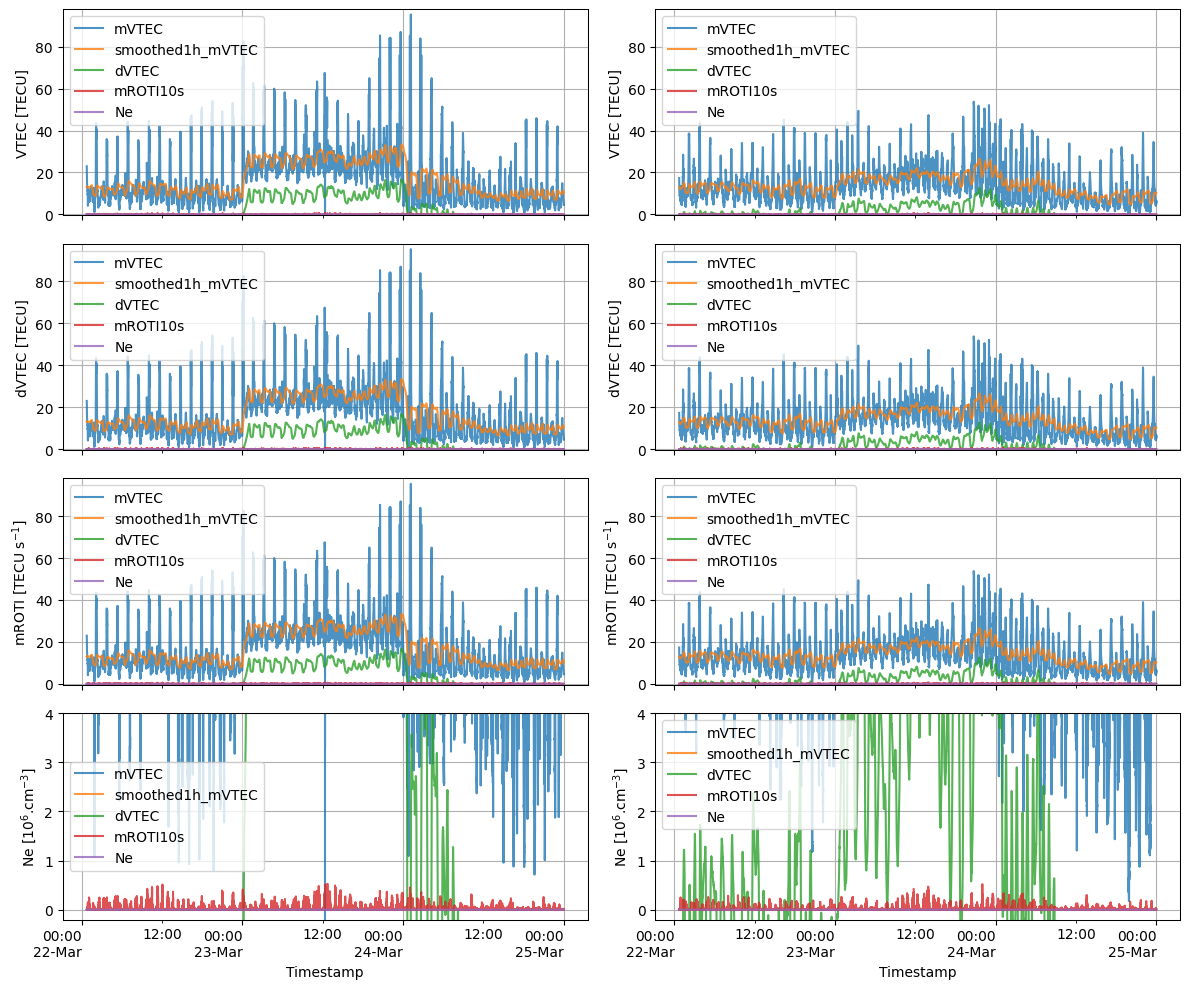

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter, HourLocator, DayLocator
import matplotlib.dates as mdates

plt.rcParams.update({'font.size': 10})
plt.rcParams["axes.linewidth"] = 0.75

# Define a function to preprocess the DataFrame
def preprocess_df(df):
    df['Ne'] = df['Ne'] / 10**6
    df['delta_Ne40s'] = df['delta_Ne40s'] / 10**6
    df['dVTEC'] = df['smoothed1h_mVTEC'] - df['smoothed1h_mVTEC'].mean()
    df['dVTEC%'] = df['dVTEC'] * 100 / ((df['smoothed1h_mVTEC'].mean() + df['smoothed1h_mVTEC'].mean()) / 2)
    return df

# Preprocess dataframes
# Preprocess dataframes
df_A = preprocess_df(df_A['2023-03-22 00:43:00':])
df_B = preprocess_df(df_B['2023-03-22 00:43:00':])

# Plotting function
def plot_data(ax, df, title):
    df.plot(ax=ax, y=['mVTEC', 'smoothed1h_mVTEC', 'dVTEC', 'mROTI10s', 'Ne'], alpha=0.8)
    ax.set_ylabel(title)
    ax.set_xlabel("Timestamp")
    ax.set_ylim(-0.2, 4) if 'Ne' in title else ax.set_ylim(-0.5, 98)
    ax.grid()

# Create subplots
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12, 10), sharex=True)

# Plot data for df_A
plot_data(axes[0,0], df_A, "VTEC [TECU]")
plot_data(axes[1,0], df_A, "dVTEC [TECU]")
plot_data(axes[2,0], df_A, "mROTI [TECU s$^{-1}$]")
plot_data(axes[3,0], df_A, "Ne [10$^{6}$.cm$^{-3}$]")

# Plot data for df_B
plot_data(axes[0,1], df_B, "VTEC [TECU]")
plot_data(axes[1,1], df_B, "dVTEC [TECU]")
plot_data(axes[2,1], df_B, "mROTI [TECU s$^{-1}$]")
plot_data(axes[3,1], df_B, "Ne [10$^{6}$.cm$^{-3}$]")

# Set major x-axis formatter for day-month and minor formatter for hour-minute
major_date_format = DateFormatter('%H:%M\n%d-%b')  # Newline followed by day-month (e.g., '\n18-Apr')
minor_date_format = DateFormatter('%H:%M')    # Hour-minute format

for ax in axes.flatten():
    ax.xaxis.set_major_formatter(major_date_format)
    ax.xaxis.set_minor_formatter(minor_date_format)
    ax.xaxis.set_major_locator(DayLocator())
    ax.xaxis.set_minor_locator(HourLocator(12))
    ax.tick_params(axis='x', rotation=0)

fig.subplots_adjust(hspace=0.3)
plt.tight_layout()
plt.show()


In [ ]:
dff['2023-03-24 23:00:00':]['smoothed2h_mVTEC'].median()

10.410687435759352

<Axes: xlabel='Timestamp'>

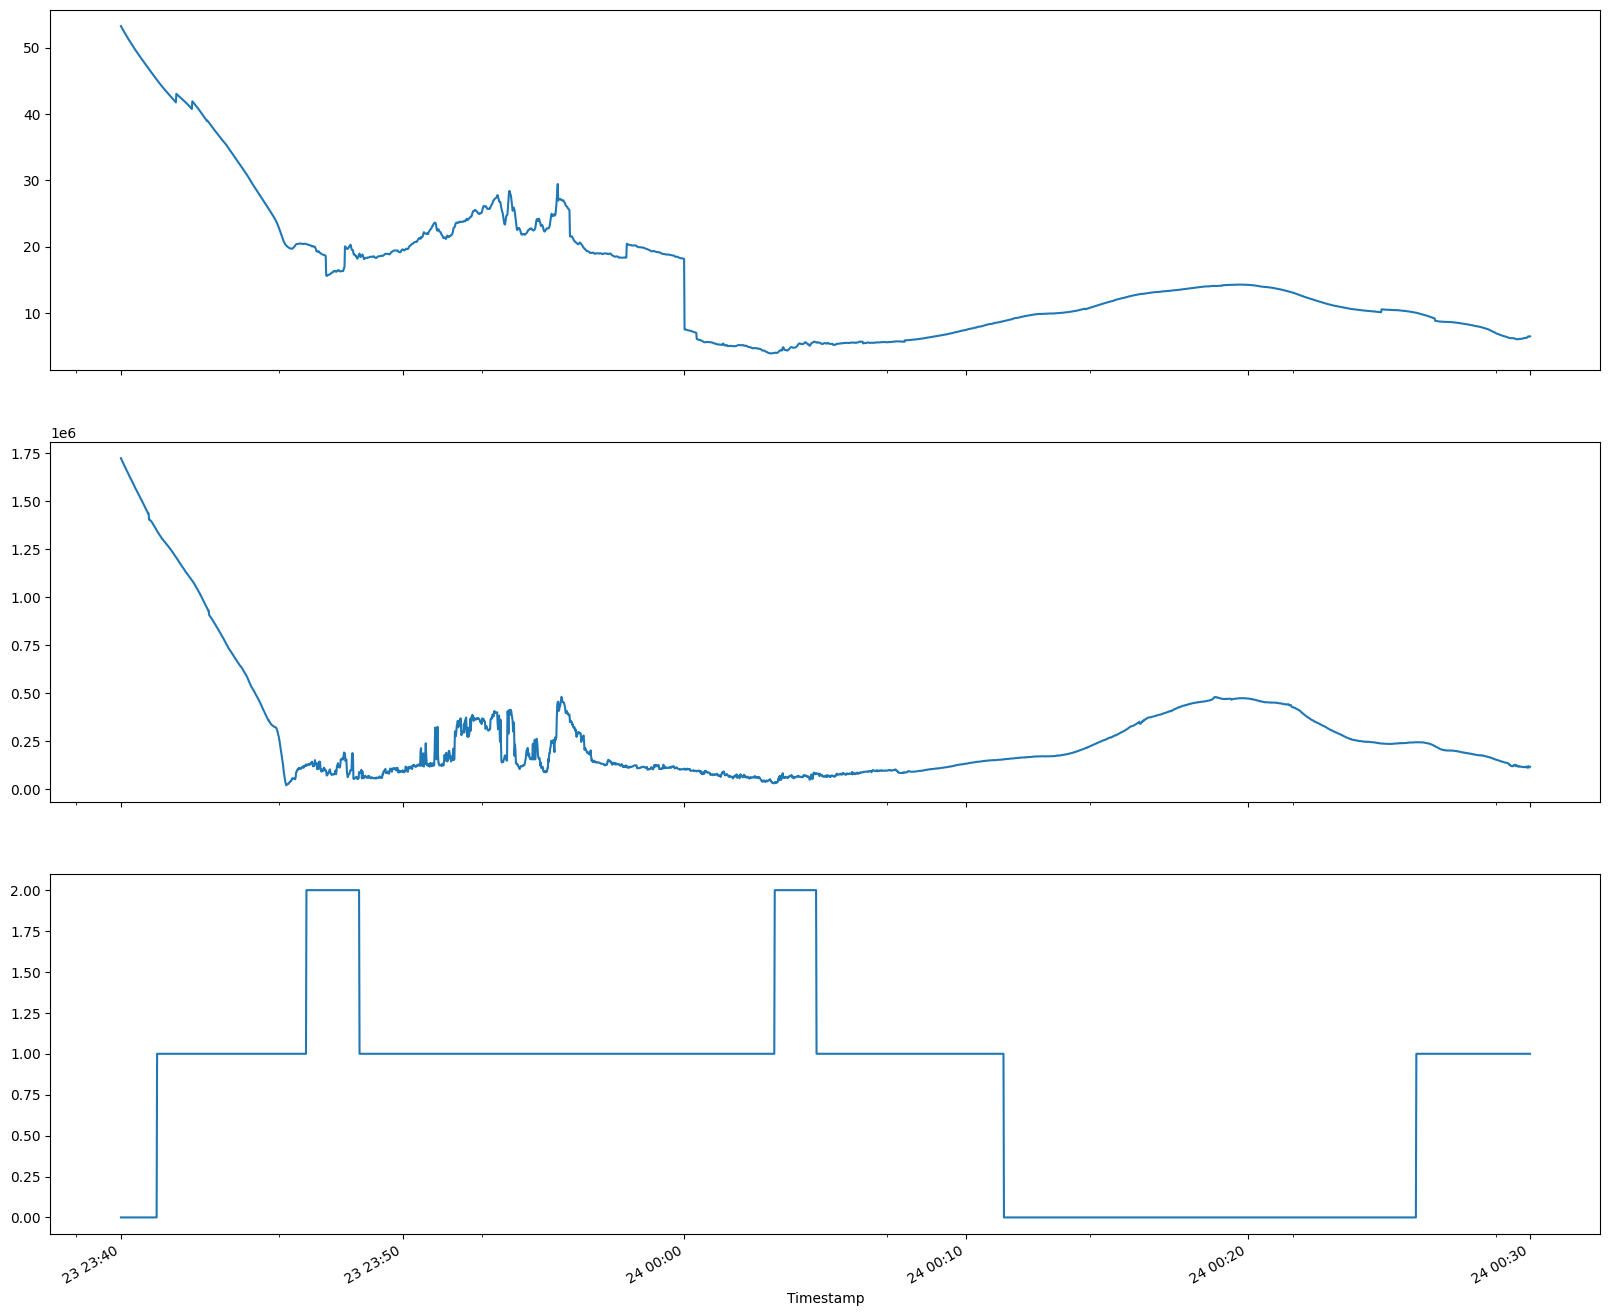

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(20,18), sharex=True)
df['Ionosphere_region_flag']['2023-03-23 23:40:00':'2023-03-24 00:30:00'].plot(ax=axes[2],)
df['mVTEC']['2023-03-23 23:40:00':'2023-03-24 00:30:00'].plot(ax=axes[0],)
df['Ne']['2023-03-23 23:40:00':'2023-03-24 00:30:00'].plot(ax=axes[1],)

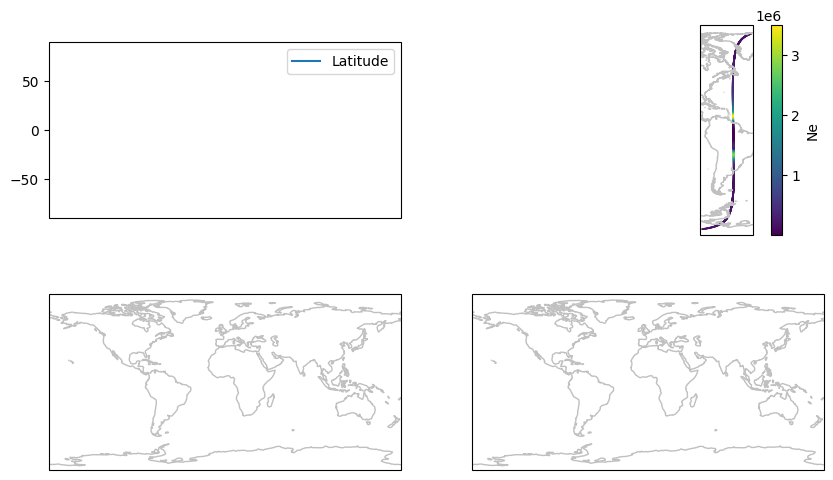

In [ ]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Assuming df is a pandas DataFrame containing the data
# Make sure you have 'Ne', 'Latitude', and 'Longitude' columns in df

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 6),
                         subplot_kw={"projection": ccrs.PlateCarree()}, sharey=True)
axes = axes.flatten()  # Flatten the 2x2 array to iterate properly

cmap = "viridis"

# Plotting xy plot on the first subplot if data exists
if not df.empty:
    df['2023-03-22 23:44:00':'2023-03-23 00:28:00'].plot(x='Ne', y='Latitude', ax=axes[0])

# Plotting scatter plot on the second subplot if data exists
if not df.empty:
    df['2023-03-22 23:44:00':'2023-03-23 00:28:00'].plot(kind='scatter', x='Longitude', y='Latitude', c='Ne', s=0.1, cmap=cmap, ax=axes[1])

# Adding coastlines to the second column panels
for ax in axes[1:]:
    ax.add_feature(cfeature.COASTLINE, edgecolor='silver')

plt.show()


<ipython-input-40-a9555dba1683>:37: FutureWarning: The 'color' parameter has been deprecated since v0.8.0 and will be removed in v0.12.0. Please use 'fill' instead.
  fig.plot(x=x, y=y, style=sty, color=Ne, cmap=True )
<ipython-input-40-a9555dba1683>:52: FutureWarning: The 'color' parameter has been deprecated since v0.8.0 and will be removed in v0.12.0. Please use 'fill' instead.
  fig.plot(x=x, y=y, style=sty, color=TEC, cmap=True)


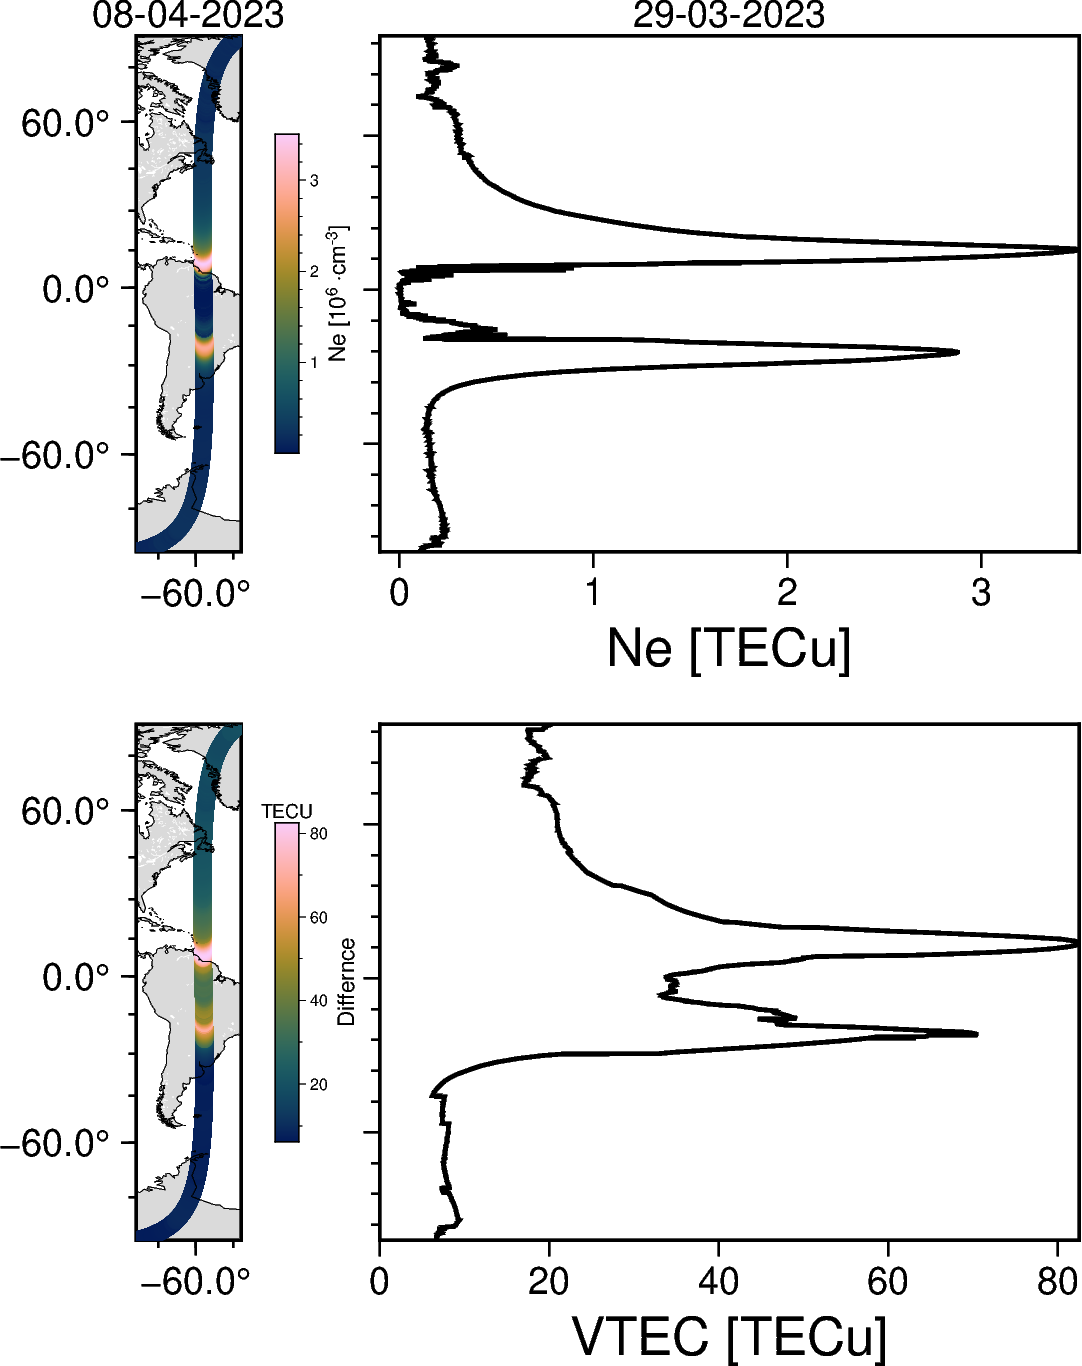

In [ ]:
fig = pygmt.Figure()
pygmt.config( FORMAT_GEO_MAP="ddd.x", MAP_FRAME_TYPE="plain", MAP_FRAME_PEN=0.75)
col_cont = '217.6/217.6/217.6'
Ne_min = df['2023-03-22 23:44:00':'2023-03-23 00:28:00']['Ne'].min()/10**6
Ne_max = df['2023-03-22 23:44:00':'2023-03-23 00:28:00']['Ne'].max()/10**6 #2.5 #f2.dNi.max()/10**6
TEC_min = df['2023-03-22 23:44:00':'2023-03-23 00:28:00']['mVTEC'].min()
TEC_max = df['2023-03-22 23:44:00':'2023-03-23 00:28:00']['mVTEC'].max() #2.5 #f2.dNi.max()/10**6

lon_min, lon_max = df['2023-03-22 23:44:00':'2023-03-23 00:28:00']['Longitude'].min(),  df['2023-03-22 23:44:00':'2023-03-23 00:28:00']['Longitude'].max()
lat_min, lat_max = df['2023-03-22 23:44:00':'2023-03-23 00:28:00']['Latitude'].min(),  df['2023-03-22 23:44:00':'2023-03-23 00:28:00']['Latitude'].max()
sty = "c0.15c"
proj= 'Cyl_stere/?' #'J?' # 'M?' # 'Kf?' # 'J?' #'N?' #"Cyl_stere/-180/-20/15c" #"m?" #"M25c" #"Y35/30/12c"
Reg = [lon_min, lon_max,lat_min, lat_max ] # "-130/-75/7/40",
# with pygmt.config(MAP_FRAME_TYPE="plain"):
Ne=df['2023-03-22 23:44:00':'2023-03-23 00:28:00']['Ne']/10**6
y=df['2023-03-22 23:44:00':'2023-03-23 00:28:00']['Latitude']
x=df['2023-03-22 23:44:00':'2023-03-23 00:28:00']['Longitude']
TEC=df['2023-03-22 23:44:00':'2023-03-23 00:28:00']['mVTEC']

pygmt.makecpt(cmap="batlow", series=[Ne_min, Ne_max])
with fig.subplot(
    nrows=2,
    ncols=2,
    figsize=("10.5c","10.2c"),
#     autolabel=True,
    margins=["-0.8c", "0.5c"],
#    sharex="b",  # shared x-axis on the bottom side
    sharey="l",  # shared y-axis on the left side
#     title="My Subplot Heading",


):
   #0,0

    fig.coast(region=Reg,  projection=proj, land=col_cont, water="white", frame=["WSrt", 'af'], panel=[0, 0] )
    pygmt.makecpt(cmap="batlow", series=[Ne_min, Ne_max])
    fig.plot(x=x, y=y, style=sty, color=Ne, cmap=True )
    fig.coast(shorelines="1/0.15p", region=Reg,  projection=proj )
    fig.text(position="TC", text="08-04-2023", offset="0/0.3c", no_clip=True)
    fig.colorbar(frame=["x+lNe [10@+6@+ @~\327@~cm@+-3@+]"], position="JMR+w2.7c/0.2c+v")
  # 0,1
    # fig.coast(region=Reg,  projection=proj, land=col_cont, water="white", panel=[0, 0] )
    fig.basemap(region=[-0.1, Ne_max, lat_min, lat_max ], projection="X?", frame=["wStr", "xa1+lNe [TECu]"], panel=[0, 1])
    fig.plot(y=y, x=Ne, pen="thick,+z,-", panel=[0, 1])
    fig.text(position="TC", text="29-03-2023" , offset="0/0.3c", no_clip=True)


    # 1,0

    fig.coast(region=Reg,  projection=proj, land=col_cont, water="white", frame=["WSrt", 'af'], panel=[1, 0] )
    pygmt.makecpt(cmap="batlow", series=[TEC_min, TEC_max])
    fig.plot(x=x, y=y, style=sty, color=TEC, cmap=True)
    fig.coast(shorelines="1/0.15p", region=Reg,  projection=proj )
    fig.colorbar(frame=["x+lDiffernce", "y+lTECU"], position="JMR+w2.7c/0.2c+v")
#1,1
    fig.basemap(region=[0, TEC_max, lat_min, lat_max ], projection="X?", frame=["wStr", "xa20+lVTEC [TECu]"], panel=[1, 1])
    fig.plot(y=y, x=TEC, pen="thick,+z,-", panel=[1, 1])

#pygmt.makecpt(cmap="batlow", series=[TEC_min, TEC_max])
#fig.colorbar(frame=["x+lTEC", "y+lTECU"], position="JBC+o-2c/0.7+w5.20c/0.2c+h")
#fig.savefig('TECmap_24_11_2023.png')
fig.show() #

<ipython-input-118-ff4d75a9e1fb>:39: FutureWarning: The 'color' parameter has been deprecated since v0.8.0 and will be removed in v0.12.0. Please use 'fill' instead.
  fig.plot(x=x, y=y, style=sty, color=Ne, cmap=True)
<ipython-input-118-ff4d75a9e1fb>:45: FutureWarning: The 'color' parameter has been deprecated since v0.8.0 and will be removed in v0.12.0. Please use 'fill' instead.
  fig.plot(x=x, y=y, style=sty, color=TEC, cmap=True)


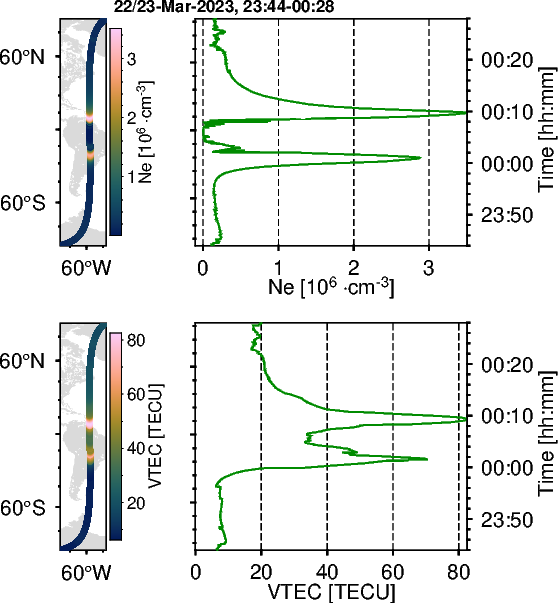

In [ ]:
# Create a new pygmt.Figure instance
fig = pygmt.Figure()
pygmt.config( MAP_FRAME_TYPE="plain", FONT_TITLE='4p', MAP_FRAME_PEN=0.25,MAP_TICK_LENGTH='1p', MAP_TITLE_OFFSET='1.5p',
             FONT_ANNOT_PRIMARY='5p', FONT_LABEL='5p',  MAP_LABEL_OFFSET='1p', MAP_GRID_PEN='0.025p,-')
col_cont = '217.6/217.6/217.6'
Ne_min = df['2023-03-22 23:44:00':'2023-03-23 00:28:00']['Ne'].min()/10**6
Ne_max = df['2023-03-22 23:44:00':'2023-03-23 00:28:00']['Ne'].max()/10**6 #2.5 #f2.dNi.max()/10**6
TEC_min = df['2023-03-22 23:44:00':'2023-03-23 00:28:00']['mVTEC'].min()
TEC_max = df['2023-03-22 23:44:00':'2023-03-23 00:28:00']['mVTEC'].max() #2.5 #f2.dNi.max()/10**6

lon_min, lon_max = df['2023-03-22 23:44:00':'2023-03-23 00:28:00']['Longitude'].min(),  df['2023-03-22 23:44:00':'2023-03-23 00:28:00']['Longitude'].max()
lat_min, lat_max = df['2023-03-22 23:44:00':'2023-03-23 00:28:00']['Latitude'].min(),  df['2023-03-22 23:44:00':'2023-03-23 00:28:00']['Latitude'].max()
sty = "c0.05c"
proj= 'Cyl_stere/?' #'J?' # 'M?' # 'Kf?' # 'J?' #'N?' #"Cyl_stere/-180/-20/15c" #"m?" #"M25c" #"Y35/30/12c"
Reg = [lon_min, lon_max,lat_min, lat_max ] # "-130/-75/7/40",
# with pygmt.config(MAP_FRAME_TYPE="plain"):
Ne=df['2023-03-22 23:44:00':'2023-03-23 00:28:00']['Ne']/10**6
y=df['2023-03-22 23:44:00':'2023-03-23 00:28:00']['Latitude']
x=df['2023-03-22 23:44:00':'2023-03-23 00:28:00']['Longitude']
TEC=df['2023-03-22 23:44:00':'2023-03-23 00:28:00']['mVTEC']
yy= y.reset_index()
T_min = yy['Timestamp'].min()
T_max = yy['Timestamp'].max()
#pygmt.makecpt(cmap="batlow", series=[Ne_min, Ne_max])
with fig.subplot(
    nrows=2,
    ncols=1,
    figsize=("8.4c", "4.5c"),  # width of 15 cm, height of 6 cm
    frame=["WSrt", 'af'],
#     autolabel=True,
    margins=["0.1c", "0.2c"],
#    sharex="b",  # shared x-axis on the bottom side
    sharey="l",  # shared y-axis on the left side

    ):
     with fig.set_panel(panel=0):
      pygmt.makecpt(cmap="batlow", series=[Ne_min, Ne_max])
      fig.coast(region=Reg,  projection=proj, land=col_cont, water="white", frame=["WSrt", 'af'])
      fig.plot(x=x, y=y, style=sty, color=Ne, cmap=True)
      pygmt.config( FONT_ANNOT_PRIMARY='12p', FONT_LABEL='12p', MAP_LABEL_OFFSET='2p')
      fig.colorbar(frame=["x+lNe [10@+6@+ @~\327@~cm@+-3@+]"], position="JMR+w1.75c/0.1c+o0.03/0p+v")
     with fig.set_panel(panel=1):
      pygmt.makecpt(cmap="batlow", series=[TEC_min, TEC_max])
      fig.coast(region=Reg,  projection=proj, land=col_cont, water="white", frame=["WSrt", 'af'], panel=[1])
      fig.plot(x=x, y=y, style=sty, color=TEC, cmap=True)
      pygmt.config( FONT_ANNOT_PRIMARY='12p', FONT_LABEL='12p', MAP_LABEL_OFFSET='2p')
      fig.colorbar(frame=["x+lVTEC [TECU]"], position="JMR+w1.75c/0.1c+o0.03/0p+v")
# in x direction
fig.shift_origin(xshift="w-3.25c")
with fig.subplot(
    nrows=2,
    ncols=1,
    figsize=("2.3c", "4.5c"),  # width of 15 cm, height of 6 cm
    margins=["0.1c", "0.2c"],
   # title="My Subplot Heading",
    ):
   with fig.set_panel(panel=0):
    fig.basemap(region=[-0.1, Ne_max, lat_min, lat_max ], projection="X?", frame=["wStr+t22/23-Mar-2023, 23:44-00:28                                              ", "xag+lNe [10@+6@+ @~\327@~cm@+-3@+]"])
    fig.plot(y=y, x=Ne, pen="0.35,green4", )
    fig.basemap( region=[yy['Latitude'].min(), yy['Latitude'].max(), datetime.datetime(2023, 3, 22, 23, 44, 0), datetime.datetime(2023, 3, 23, 0, 28, 0)],
                frame=["E", "yaf+l Time [hh:mm]"] )
   with fig.set_panel(panel=1):
    fig.basemap(region=[0, TEC_max, lat_min, lat_max ], projection="X?", frame=["wStr", "xag+lVTEC [TECU]"], panel=[1])
    fig.plot(y=y, x=TEC, pen="0.35P,green4")
    fig.basemap( region=[yy['Latitude'].min(), yy['Latitude'].max(),  datetime.datetime(2023, 3, 22, 23, 44, 0), datetime.datetime(2023, 3, 23, 0, 28, 0)],
                frame=["E", "yaf+l Time [hh:mm]"] )

fig.show() #

In [ ]:
import pandas as pd

fig = pygmt.Figure()
pygmt.config(FORMAT_DATE_MAP="o")
ddf = df.reset_index()
fig.plot(
    region=[ddf.Timestamp.min(),ddf.Timestamp.max(),ddf.mVTEC.min(),ddf.mVTEC.max()],
    projection="X15c/10c",
    frame=["WSen", "afg"],
    y=ddf.mVTEC,
    x=ddf.Timestamp,
    pen="1p,blue4",

)

fig.show()

NameError: name 'pygmt' is not defined

In [ ]:
ddf = df.reset_index()
ddf

Timestamp   TEC_STD     RODI10s    ROD  \
0      2023-03-22 00:00:00.197000027  1.481764  131.219601 -472.3   
1      2023-03-22 00:00:01.197000027  1.477250  134.633371 -594.8   
2      2023-03-22 00:00:02.197000027  1.474740  156.812202 -453.2   
3      2023-03-22 00:00:03.197000027  1.474657  185.174252 -204.2   
4      2023-03-22 00:00:04.197000027  1.472644  196.609860 -488.8   
...                              ...       ...         ...    ...   
259195 2023-03-24 23:59:55.197000027  0.697729  385.865990    0.0   
259196 2023-03-24 23:59:56.197007895  0.685859  413.162583 -838.4   
259197 2023-03-24 23:59:57.197000027  0.677774  412.927946 -838.4   
259198 2023-03-24 23:59:58.197000027  0.683210  555.435327    0.0   
259199 2023-03-24 23:59:59.197000027  0.676833  641.715489  569.1   

        Num_GPS_satellites        Ne           Te   Latitude  delta_Ne10s  \
0                        5  249416.2  2635.703904 -30.754619      148.700   
1                        5  249762.4  2648.573374 -30.818432      165.925   
2                        5  248564.3  2642.467544 -30.882200      113.300   
3                        5  248135.3  2645.021228 -30.945968       10.750   
4                        5  248685.9  2647.933698 -31.009735       51.050   
...                    ...       ...          ...        ...          ...   
259195                   6  133681.1  3244.244115 -45.387631     1794.500   
259196                   6  133782.1  3307.003676 -45.451312     1314.400   
259197                   6  126561.9  3311.090767 -45.514993      895.300   
259198                   6  127060.2  3269.359516 -45.578672     1134.550   
259199                   6  127131.0  3283.526824 -45.642352      410.775   

        IPIR_index  ...        Radius  Grad_Ne_at_PCP_edge  Background_Ne  \
0                3  ...  6.844064e+06                  0.0  233476.296875   
1                3  ...  6.844073e+06                  0.0  233027.703125   
2                3  ...  6.844080e+06                  0.0  232810.203125   
3                3  ...  6.844086e+06                  0.0  232501.703125   
4                3  ...  6.844092e+06                  0.0  232288.796875   
...            ...  ...           ...                  ...            ...   
259195           4  ...  6.845036e+06                  0.0  132542.796875   
259196           4  ...  6.845040e+06                  0.0  132513.906250   
259197           4  ...  6.845044e+06                  0.0  132277.593750   
259198           4  ...  6.845048e+06                  0.0  132060.703125   
259199           4  ...  6.845052e+06                  0.0  131904.203125   

        Foreground_Ne  delta_Ne20s  IBI_flag  Spacecraft  Grad_Ne_at_50km  \
0       250174.000000      148.700        -1           A        -0.054539   
1       249762.406250      165.925        -1           A        -0.055650   
2       249476.093750      113.300        -1           A        -0.055459   
3       248685.906250       10.750        -1           A        -0.053244   
4       248585.796875       51.050        -1           A        -0.058574   
...               ...          ...       ...         ...              ...   
259195  133782.093750     1794.500        -1           A        -0.123091   
259196  133782.093750     1314.400        -1           A        -0.169039   
259197  133782.093750      895.300        -1           A        -0.174234   
259198  127131.000000     1134.550        -1           A        -0.119259   
259199  127867.000000      410.775     99999           A        -0.033581   

        Ionosphere_region_flag  mROTI10s  
0                            1  0.003795  
1                            1  0.003422  
2                            1  0.003129  
3                            1  0.003328  
4                            1  0.003696  
...                        ...       ...  
259195                       1       NaN  
259196                       1       NaN  
259197                       1      

<ipython-input-86-f75c2ee3bf96>:41: FutureWarning: The 'color' parameter has been deprecated since v0.8.0 and will be removed in v0.12.0. Please use 'fill' instead.
  fig.plot(x=x, y=y, style=sty, color=Ne, cmap=True)
<ipython-input-86-f75c2ee3bf96>:47: FutureWarning: The 'color' parameter has been deprecated since v0.8.0 and will be removed in v0.12.0. Please use 'fill' instead.
  fig.plot(x=x, y=y, style=sty, color=TEC, cmap=True)


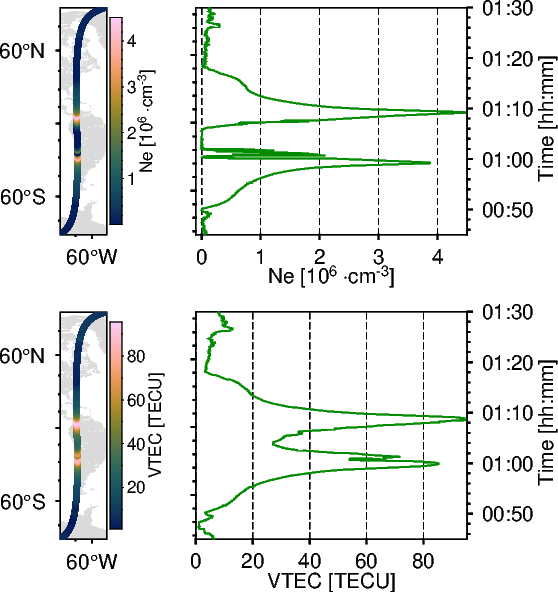

In [ ]:
import datetime
# Create a new pygmt.Figure instance
fig = pygmt.Figure()
pygmt.config( MAP_FRAME_TYPE="plain", MAP_FRAME_PEN=0.25, MAP_TICK_LENGTH='1p', FONT_ANNOT_PRIMARY='5p', FONT_LABEL='5p',  MAP_LABEL_OFFSET='1p', MAP_GRID_PEN='0.015p,-')
col_cont = '217.6/217.6/217.6'
Ne_min = df['2023-03-24 00:45:00':'2023-03-24 01:30:00']['Ne'].min()/10**6
Ne_max = df['2023-03-24 00:45:00':'2023-03-24 01:30:00']['Ne'].max()/10**6 #2.5 #f2.dNi.max()/10**6
TEC_min = df['2023-03-24 00:45:00':'2023-03-24 01:30:00']['mVTEC'].min()
TEC_max = df['2023-03-24 00:45:00':'2023-03-24 01:30:00']['mVTEC'].max() #2.5 #f2.dNi.max()/10**6

lon_min, lon_max = df['2023-03-24 00:46:00':'2023-03-24 01:30:00']['Longitude'].min(), df['2023-03-24 00:46:00':'2023-03-24 01:30:00']['Longitude'].max()
lat_min, lat_max = df['2023-03-24 00:46:00':'2023-03-24 01:30:00']['Latitude'].min(), df['2023-03-24 00:46:00':'2023-03-24 01:30:00']['Latitude'].max()
sty = "c0.05c"
proj= 'Cyl_stere/?' #'J?' # 'M?' # 'Kf?' # 'J?' #'N?' #"Cyl_stere/-180/-20/15c" #"m?" #"M25c" #"Y35/30/12c"
Reg = [lon_min, lon_max,lat_min, lat_max ] # "-130/-75/7/40",
# with pygmt.config(MAP_FRAME_TYPE="plain"):
Ne=df['2023-03-24 00:45:00':'2023-03-24 01:30:00']['Ne']/10**6
y=df['2023-03-24 00:45:00':'2023-03-24 01:30:00']['Latitude']
x=df['2023-03-24 00:45:00':'2023-03-24 01:30:00']['Longitude']
TEC=df['2023-03-24 00:45:00':'2023-03-24 01:30:00']['mVTEC']

yy= y.reset_index()
T_min = yy['Timestamp'].min()
T_max = yy['Timestamp'].max()

#pygmt.makecpt(cmap="batlow", series=[Ne_min, Ne_max])
with fig.subplot(
    nrows=2,
    ncols=1,
    figsize=("8.4c", "4.5c"),  # width of 15 cm, height of 6 cm
    frame=["WSrt", 'af'],
#     autolabel=True,
    margins=["0.1c", "0.2c"],
#    sharex="b",  # shared x-axis on the bottom side
    sharey="l",  # shared y-axis on the left side
#     title="My Subplot Heading",
    ):
     with fig.set_panel(panel=0):
      pygmt.makecpt(cmap="batlow", series=[Ne_min, Ne_max])
      fig.coast(region=Reg,  projection=proj, land=col_cont, water="white", frame=["WSrt", 'af'])
      fig.plot(x=x, y=y, style=sty, color=Ne, cmap=True)
      pygmt.config( FONT_ANNOT_PRIMARY='12p', FONT_LABEL='12p', MAP_LABEL_OFFSET='2p')
      fig.colorbar(frame=["x+lNe [10@+6@+ @~\327@~cm@+-3@+]"], position="JMR+w1.75c/0.1c+o0.03/0p+v")
     with fig.set_panel(panel=1):
      pygmt.makecpt(cmap="batlow", series=[TEC_min, TEC_max])
      fig.coast(region=Reg,  projection=proj, land=col_cont, water="white", frame=["WSrt", 'af'], panel=[1])
      fig.plot(x=x, y=y, style=sty, color=TEC, cmap=True)
      pygmt.config( FONT_ANNOT_PRIMARY='12p', FONT_LABEL='12p', MAP_LABEL_OFFSET='2p')
      fig.colorbar(frame=["x+lVTEC [TECU]"], position="JMR+w1.75c/0.1c+o0.03/0p+v")
# in x direction
fig.shift_origin(xshift="w-3.25c")
with fig.subplot(
    nrows=2,
    ncols=1,
    figsize=("2.3c", "4.5c"),  # width of 15 cm, height of 6 cm
    margins=["0.1c", "0.2c"],

    ):
   with fig.set_panel(panel=0):
    fig.basemap(region=[-0.1, Ne_max, lat_min, lat_max ], projection="X?", frame=["wStr", "xag+lNe [10@+6@+ @~\327@~cm@+-3@+]"])
    fig.plot(y=y, x=Ne, pen="0.35,green4", )
    fig.basemap( region=[yy['Latitude'].min(), yy['Latitude'].max(),  datetime.datetime(2023, 3, 24, 0, 45, 0), datetime.datetime(2023, 3, 24, 1, 30, 0)],
                frame=["E", "yaf+l Time [hh:mm]"] )
   with fig.set_panel(panel=1):
    fig.basemap(region=[0, TEC_max, lat_min, lat_max ], projection="X?", frame=["wStr", "xag+lVTEC [TECU]"], panel=[1])
    fig.plot(y=y, x=TEC, pen="0.35P,green4")
    fig.basemap( region=[yy['Latitude'].min(), yy['Latitude'].max(),  datetime.datetime(2023, 3, 24, 0, 45, 0), datetime.datetime(2023, 3, 24, 1, 30, 0)],
                frame=["E", "yaf+l Time [hh:mm]"] )

fig.show() #

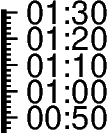

In [ ]:
x =yy.Timestamp
y = yy.Latitude

fig = pygmt.Figure()
fig.basemap(
    projection="Xc/1c",
    region=[0, y.max(),
        datetime.datetime(2023, 3, 24, 0, 45, 0),
        datetime.datetime(2023, 3, 24, 1, 30, 0),
    ],
    frame=["E", "af"],

)
fig.show()

In [ ]:
request.set_collection("SW_OPER_IPDAIRR_2F")
request.set_products(measurements=request.available_measurements("IPD"))
data = request.get_between(
    dt.datetime(2023,3,22),
    dt.datetime(2023,3,25)
)

Processing:  100%|██████████|  [ Elapsed: 00:02, Remaining: 00:00 ] [1/1] 
Downloading: 100%|██████████|  [ Elapsed: 00:02, Remaining: 00:00 ] (54.19MB)


In [ ]:
df = data.as_dataframe()
df.head()

IPIR_index     mVTEC   Latitude  Foreground_Ne  \
Timestamp                                                                       
2023-03-22 00:00:00.197000027           3  6.135024 -30.754619  250174.000000   
2023-03-22 00:00:01.197000027           3  6.130224 -30.818432  249762.406250   
2023-03-22 00:00:02.197000027           3  6.131240 -30.882200  249476.093750   
2023-03-22 00:00:03.197000027           3  6.118011 -30.945968  248685.906250   
2023-03-22 00:00:04.197000027           3  6.114212 -31.009735  248585.796875   

                               Ne_quality_flag  Ionosphere_region_flag  \
Timestamp                                                                
2023-03-22 00:00:00.197000027            10000                       1   
2023-03-22 00:00:01.197000027            10000                       1   
2023-03-22 00:00:02.197000027            10000                       1   
2023-03-22 00:00:03.197000027            10000                       1   
2023-03-22 00:00:04.197000027            10000                       1   

                               PCP_flag  Num_GPS_satellites        Radius  \
Timestamp                                                                   
2023-03-22 00:00:00.197000027         0                   5  6.844064e+06   
2023-03-22 00:00:01.197000027         0                   5  6.844073e+06   
2023-03-22 00:00:02.197000027         0                   5  6.844080e+06   
2023-03-22 00:00:03.197000027         0                   5  6.844086e+06   
2023-03-22 00:00:04.197000027         0                   5  6.844092e+06   

                                  RODI20s  ...   Longitude  \
Timestamp                                  ...               
2023-03-22 00:00:00.197000027  162.927251  ...  127.597832   
2023-03-22 00:00:01.197000027  182.591063  ...  127.597652   
2023-03-22 00:00:02.197000027  192.886282  ...  127.597472   
2023-03-22 00:00:03.197000027  198.816377  ...  127.597297   
2023-03-22 00:00:04.197000027  202.732258  ...  127.597128   

                              Grad_Ne_at_PCP_edge      mROT  delta_Ne20s  \
Timestamp                                                                  
2023-03-22 00:00:00.197000027                 0.0 -0.001300      148.700   
2023-03-22 00:00:01.197000027                 0.0 -0.012197      165.925   
2023-03-22 00:00:02.197000027                 0.0 -0.012105      113.300   
2023-03-22 00:00:03.197000027                 0.0 -0.012105       10.750   
2023-03-22 00:00:04.197000027                 0.0 -0.007374       51.050   

                               IBI_flag  delta_Ne40s           Te  mROTI20s  \
Timestamp                                                                     
2023-03-22 00:00:00.197000027        -1      148.700  2635.703904  0.003511   
2023-03-22 00:00:01.197000027        -1      165.925  2648.573374  0.003351   
2023-03-22 00:00:02.197000027        -1      113.300  2642.467544  0.003211   
2023-03-22 00:00:03.197000027        -1       10.750  2645.021228  0.003267   
2023-03-22 00:00:04.197000027        -1       51.050  2647.933698  0.003238   

                               Grad_Ne_at_100km  Grad_Ne_at_50km  
Timestamp                                                         
2023-03-22 00:00:00.197000027         -0.054656        -0.054539  
2023-03-22 00:00:01.197000027         -0.056056        -0.055650  
2023-03-22 00:00:02.197000027         -0.058766        -0.055459  
2023-03-22 00:00:03.197000027         -0.061499        -0.053244  
2023-03-22 00:00:04.197000027         -0.063973        -0.058574  

[5 rows x 29 columns]

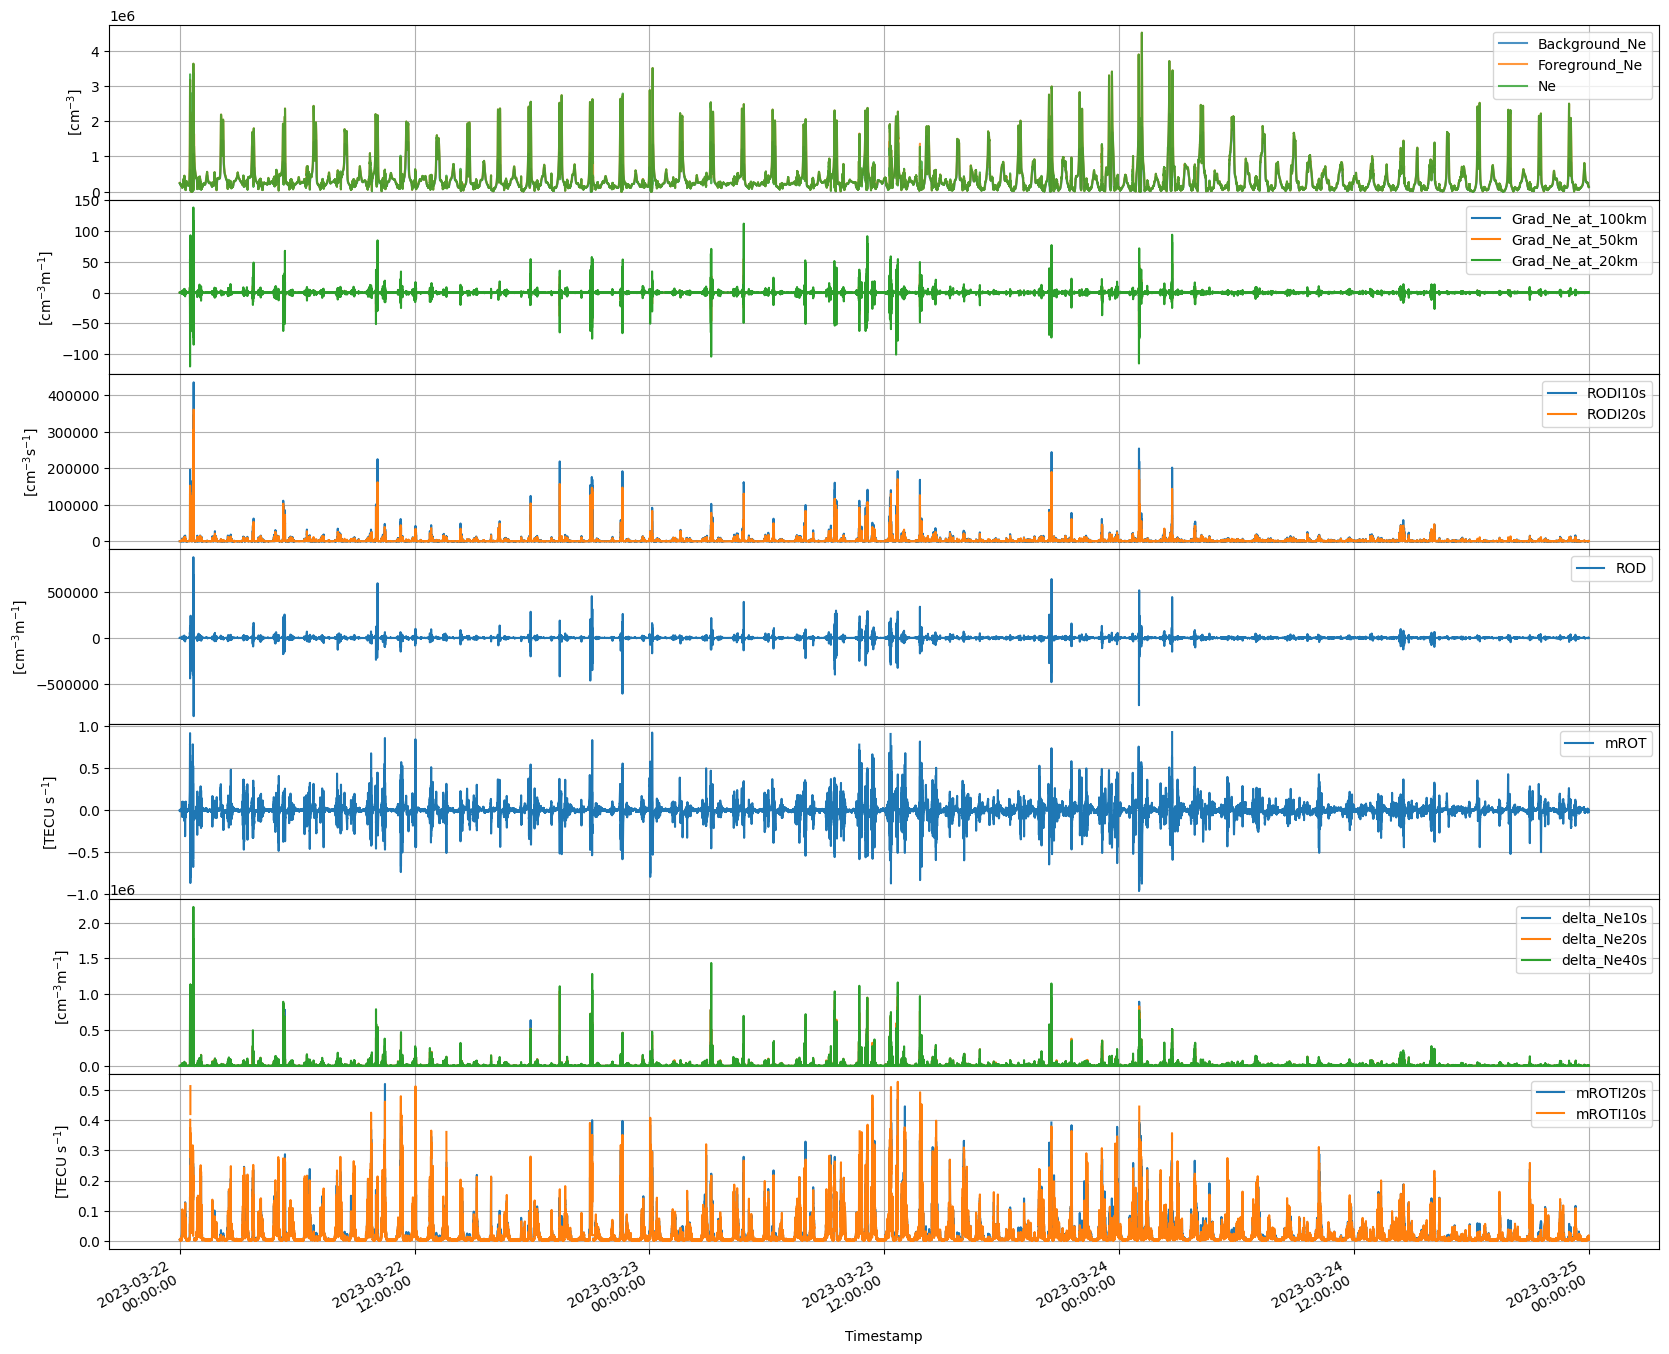

In [ ]:
fig, axes = plt.subplots(nrows=7, ncols=1, figsize=(20,18), sharex=True)
df.plot(ax=axes[0], y=['Background_Ne', 'Foreground_Ne', 'Ne'], alpha=0.8)
df.plot(ax=axes[1], y=['Grad_Ne_at_100km', 'Grad_Ne_at_50km', 'Grad_Ne_at_20km'])
df.plot(ax=axes[2], y=['RODI10s', 'RODI20s'])
df.plot(ax=axes[3], y=['ROD'])
df.plot(ax=axes[4], y=['mROT'])
df.plot(ax=axes[5], y=['delta_Ne10s', 'delta_Ne20s', 'delta_Ne40s'])
df.plot(ax=axes[6], y=['mROTI20s', 'mROTI10s'])
axes[0].set_ylabel("[cm$^{-3}$]")
axes[1].set_ylabel("[cm$^{-3}$m$^{-1}$]")
axes[2].set_ylabel("[cm$^{-3}$s$^{-1}$]")
axes[3].set_ylabel("[cm$^{-3}$m$^{-1}$]")
axes[4].set_ylabel("[TECU s$^{-1}$]")
axes[5].set_ylabel("[cm$^{-3}$m$^{-1}$]")
axes[6].set_ylabel("[TECU s$^{-1}$]")
axes[6].set_xlabel("Timestamp")

for ax in axes:
    # Reformat time axis
    # https://www.earthdatascience.org/courses/earth-analytics-python/use-time-series-data-in-python/customize-dates--matplotlib-plots-python/
    ax.xaxis.set_major_formatter(DateFormatter("%Y-%m-%d\n%H:%M:%S"))
    ax.legend(loc="upper right")
    ax.grid()
fig.subplots_adjust(hspace=0)

In [ ]:
#SWARM-A
request.set_collection("SW_OPER_TECATMS_2F")
request.set_products(measurements=request.available_measurements("TEC"))
data = request.get_between(dt.datetime(2023,3,22),
                           dt.datetime(2023,3,25))

Processing:  100%|██████████|  [ Elapsed: 00:02, Remaining: 00:00 ] [1/1] 
Downloading: 100%|██████████|  [ Elapsed: 00:12, Remaining: 00:00 ] (243.64MB)


In [ ]:
ds = data.as_xarray()
df = data.as_dataframe()


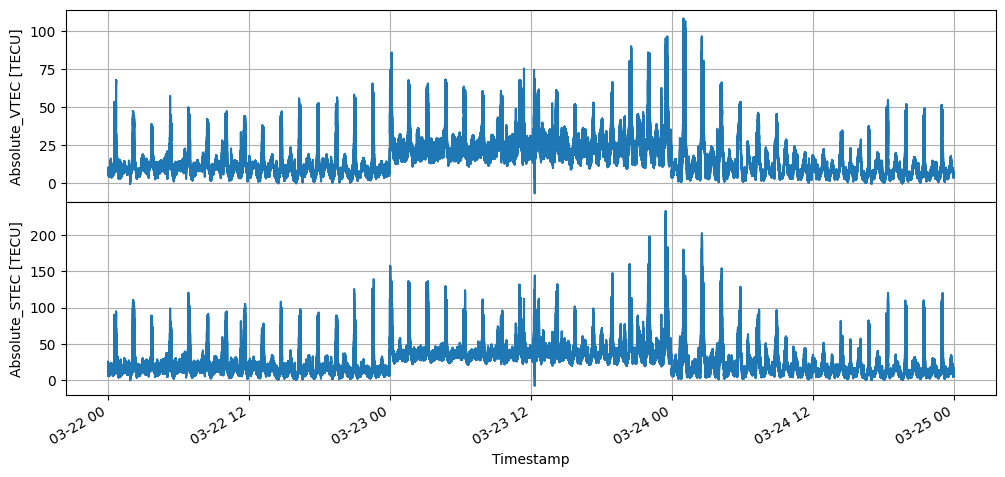

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12,5), sharex=True)
ds["Absolute_VTEC"].plot.line(x="Timestamp", ax=axes[0])
ds["Absolute_STEC"].plot.line(x="Timestamp", ax=axes[1]);
fig.subplots_adjust(hspace=0)
axes[1].grid()
axes[0].grid()

<Axes: xlabel='Latitude'>

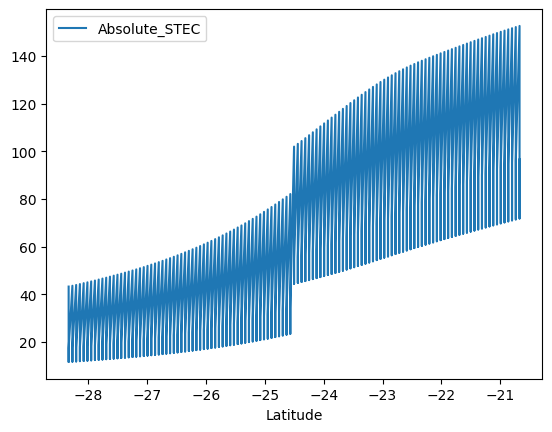

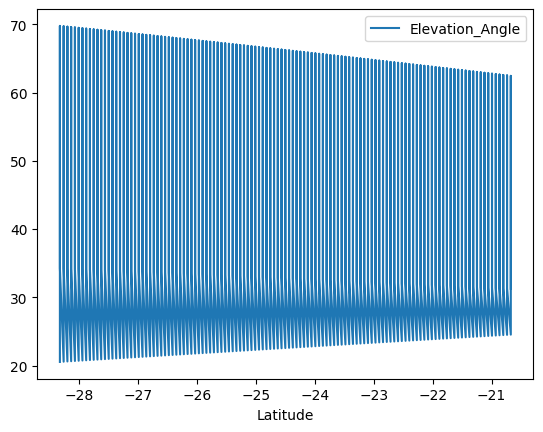

In [ ]:

TEC00=df['2023-03-22 23:59:00':'2023-03-23 00:01:00']
tec_sel=TEC00 #[TEC00['PRN'] == 5]
tec_sel=tec_sel.reset_index()
tec_sel.plot(x='Latitude',y='Absolute_STEC' )
tec_sel.plot(x='Latitude',y='Elevation_Angle' )
#TEC00['PRN']


Processing:  100%|██████████|  [ Elapsed: 00:02, Remaining: 00:00 ] [1/1] 
Downloading: 100%|██████████|  [ Elapsed: 00:09, Remaining: 00:00 ] (261.221MB)


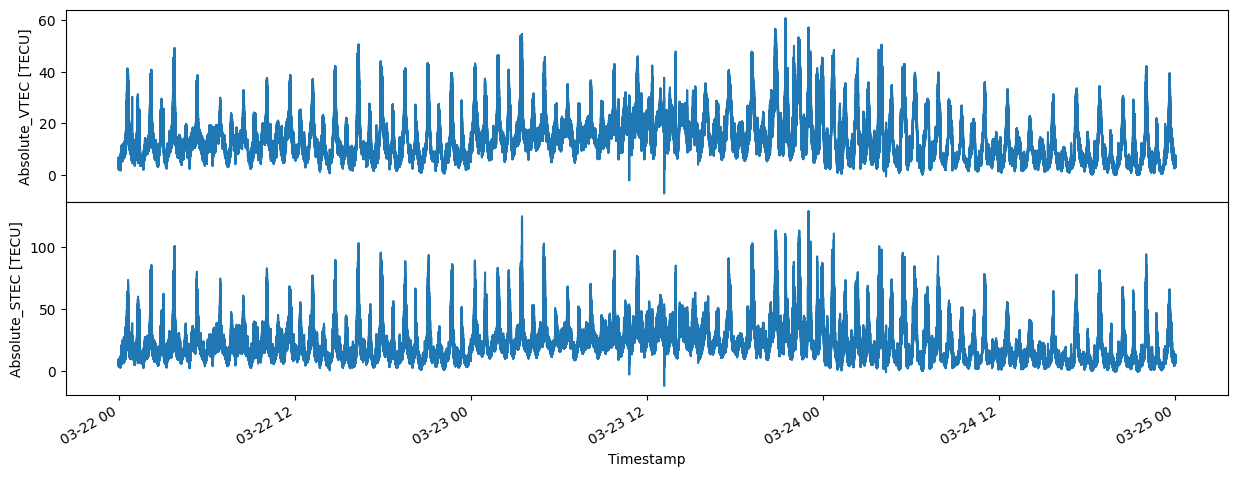

In [ ]:
#SWARM-B
request.set_collection("SW_OPER_TECBTMS_2F")
request.set_products(measurements=request.available_measurements("TEC"))
data = request.get_between(dt.datetime(2023,3,22),
                           dt.datetime(2023,3,25))
ds = data.as_xarray()
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15,5), sharex=True)
ds["Absolute_VTEC"].plot.line(x="Timestamp", ax=axes[0])
ds["Absolute_STEC"].plot.line(x="Timestamp", ax=axes[1]);
fig.subplots_adjust(hspace=0)

Processing:  100%|██████████|  [ Elapsed: 00:02, Remaining: 00:00 ] [1/1] 
Downloading: 100%|██████████|  [ Elapsed: 00:10, Remaining: 00:00 ] (246.547MB)


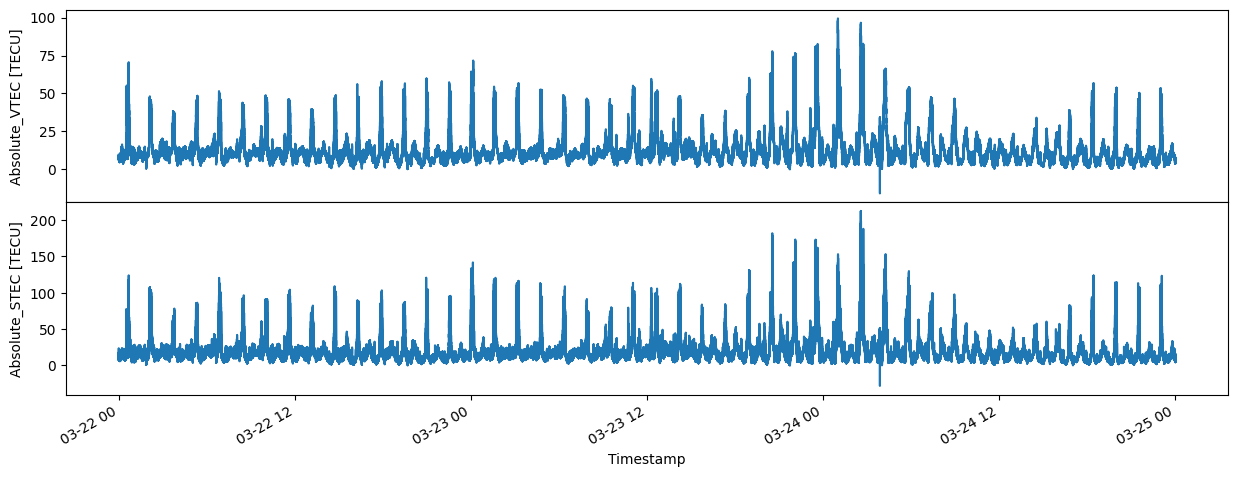

In [ ]:
#SWARM-C
request.set_collection("SW_OPER_TECCTMS_2F")
request.set_products(measurements=request.available_measurements("TEC"))
data = request.get_between(dt.datetime(2023,3,22),
                           dt.datetime(2023,3,25))
ds = data.as_xarray()
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15,5), sharex=True)
ds["Absolute_VTEC"].plot.line(x="Timestamp", ax=axes[0])
ds["Absolute_STEC"].plot.line(x="Timestamp", ax=axes[1]);
fig.subplots_adjust(hspace=0)

In [ ]:
request.available_measurements("EFI")
request.set_collection("SW_OPER_EFIA_LP_1B")
request.set_products(
    measurements=['U_orbit',
                 'Ne',
                 'Ne_error',
                 'Te',
                 'Te_error',
                 'Vs',
                 'Vs_error',
                 'Flags_LP',
                 'Flags_Ne',
                 'Flags_Te',
                 'Flags_Vs']
)
data = request.get_between(
    dt.datetime(2023,3,22),
    dt.datetime(2023,3,25)
)

Processing:  100%|██████████|  [ Elapsed: 00:02, Remaining: 00:00 ] [1/1] 
Downloading: 100%|██████████|  [ Elapsed: 00:02, Remaining: 00:00 ] (48.196MB)


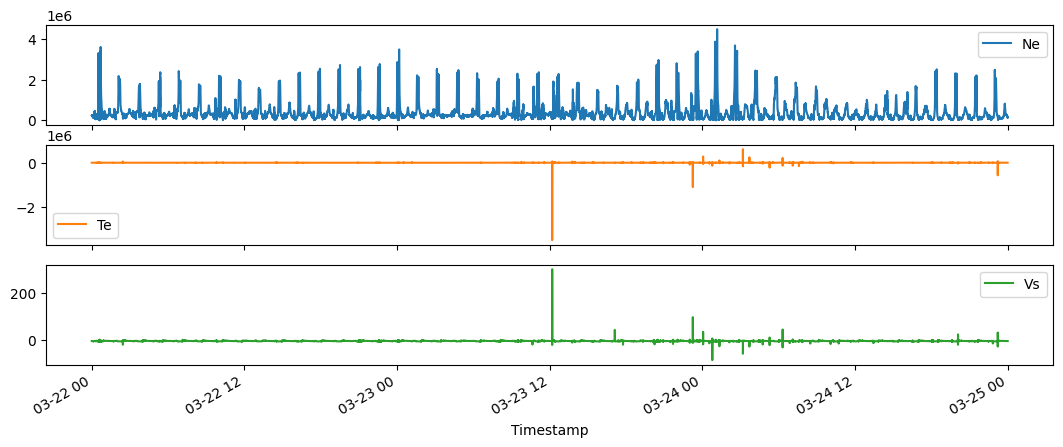

In [ ]:
df = data.as_dataframe()
df.plot(y=["Ne", "Te", "Vs"], subplots=True, figsize=(13,5));

# Fetch one day from Swarm Alpha and Charlie

In [ ]:
!pip install cartopy

In [ ]:
from viresclient import SwarmRequest
import datetime as dt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import cartopy.crs as ccrs
import cartopy.feature as cfeature

request = SwarmRequest()

In [ ]:
request.available_collections("FAC", details=False)
request.set_collection("SW_OPER_FACATMS_2F", "SW_OPER_FACCTMS_2F", "SW_OPER_FACBTMS_2F")
request.set_products(
    measurements=["FAC", "FAC_Error",
                  "Flags", "Flags_F", "Flags_B", "Flags_q"],
    auxiliaries=["QDLat", "QDLon", "OrbitNumber"],
)
data = request.get_between(
    dt.datetime(2023,3,22),
    dt.datetime(2023,3,25)
)

Processing:  100%|██████████|  [ Elapsed: 00:04, Remaining: 00:00 ] [1/1] 
Downloading: 100%|██████████|  [ Elapsed: 00:02, Remaining: 00:00 ] (66.107MB)


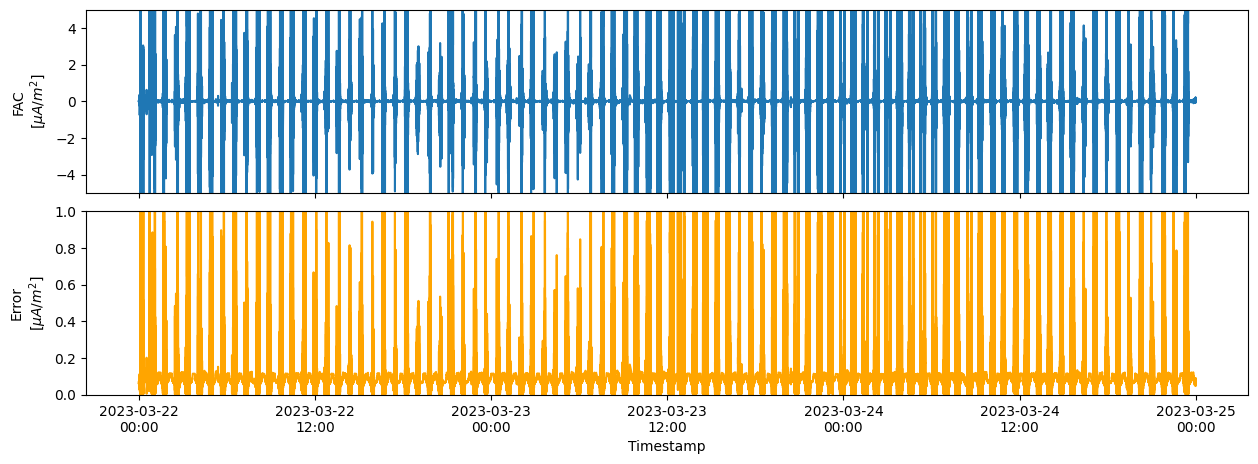

In [ ]:
ds = data.as_xarray()
df = data.as_dataframe()
df = df.sort_index()

#---------------------------------------------
# plot
fig, axes = plt.subplots(ncols=1, nrows=2, figsize=(15,5))
# Select out the time series from Swarm Alpha
dfA = df.where(df["Spacecraft"] == "A").dropna()
axes[0].plot(dfA.index, dfA["FAC"])
axes[1].plot(dfA.index, dfA["FAC_Error"], color="orange")
axes[0].set_ylabel("FAC\n[$\mu A / m^2$]");
axes[1].set_ylabel("Error\n[$\mu A / m^2$]");
axes[1].set_xlabel("Timestamp");
date_format = mdates.DateFormatter('%Y-%m-%d\n%H:%M')
axes[1].xaxis.set_major_formatter(date_format)
axes[0].set_ylim(-5, 5);
axes[1].set_ylim(0, 1);
axes[0].set_xticklabels([])
fig.subplots_adjust(hspace=0.1)

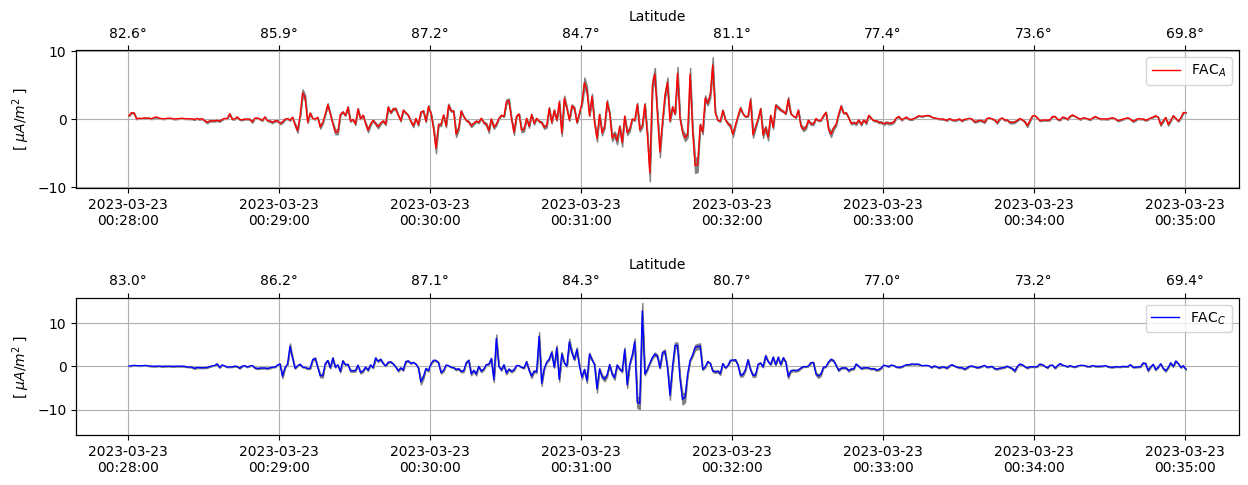

In [ ]:
def line_plot(fig, ax, df, varname="FAC", spacecraft="A", color="red"):
    """Plot FAC as a line, given a dataframe"""
    df = df.copy()
    df = df.where(df["Spacecraft"] == spacecraft).dropna()
    ax.plot(df.index, df[varname], linewidth=1,
            label=f"{varname}$_{spacecraft}$", color=color)
    # Plot error range as filled area
    if varname == "FAC":
        ax.fill_between(df.index,
                        df["FAC"] - df["FAC_Error"],
                        df["FAC"] + df["FAC_Error"], color="grey")
    # Adjust limits and label formatting
    datetime_format = "%Y-%m-%d\n%H:%M:%S"
    xlabel_format = mdates.DateFormatter(datetime_format)
    ax.xaxis.set_major_formatter(xlabel_format)
    ax.set_ylabel("[ $\mu A / m^2$ ]")
    # Make y-axis symmetric about zero
    ylim = max(abs(y) for y in ax.get_ylim())
    ax.set_ylim((-ylim, ylim))
    ax.legend()
    ax.grid(True)
    # Set up an extra xaxis at the top, to display Latitude
    ax2 = ax.twiny()
    ax2.set_xlim(ax.get_xlim())
    ax2.set_xticks(ax.get_xticks())
    # Identify closest times in dataframe to use for Latitude labels
    # NB need to draw the figure now in order to get the xticklabels
    #  https://stackoverflow.com/a/41124884
    fig.canvas.draw()
    # Extract times from the lower x axis
    # Use them to find the nearest Lat values in the dataframe
    xtick_times = [dt.datetime.strptime(ts.get_text(), datetime_format) for ts in ax.get_xticklabels()]
    ilocs = [df.index.get_indexer([t], method="nearest")[0] for t in xtick_times]
    lats = df.iloc[ilocs]["Latitude"]
    lat_labels = ["{}°".format(s) for s in np.round(lats.values, decimals=1)]
    ax2.set_xticklabels(lat_labels)
    ax2.set_xlabel("Latitude")

# Easy pandas-style slicing of the dataframe
df_subset = df['2023-03-23T00:28:00':'2023-03-23T00:35:00']
fig, axes = plt.subplots(nrows=2, figsize=(15, 5))
line_plot(fig, axes[0], df_subset, spacecraft="A", color="red")
line_plot(fig, axes[1], df_subset, spacecraft="C", color="blue")
fig.subplots_adjust(hspace=0.8)



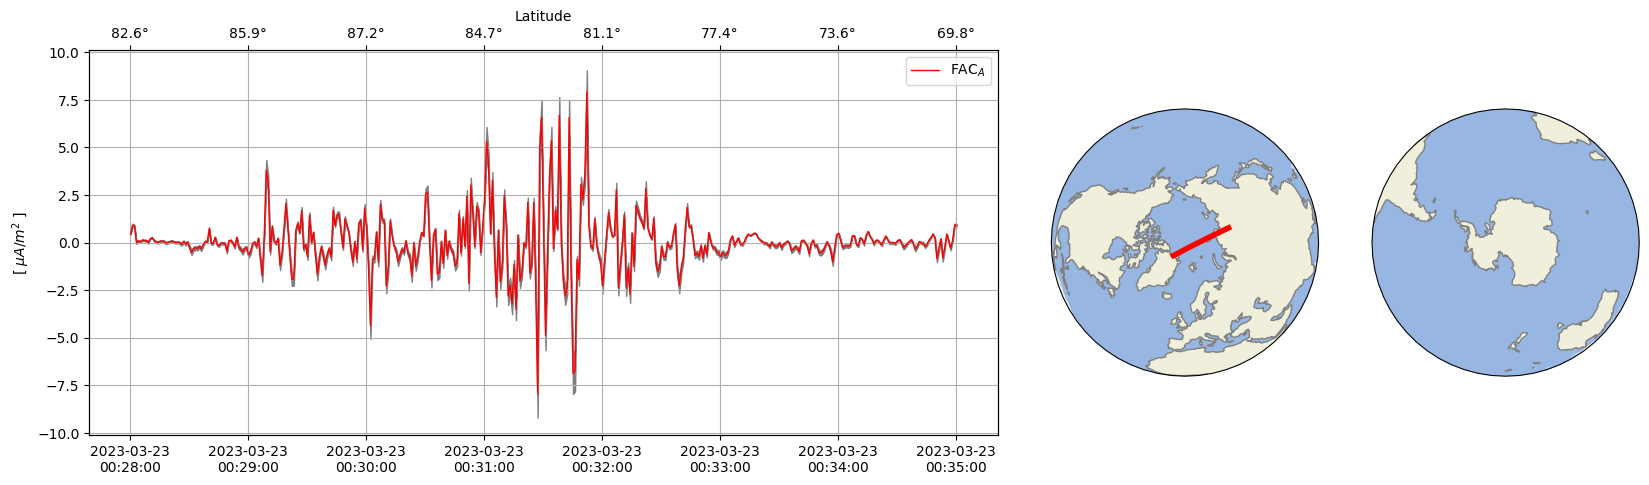

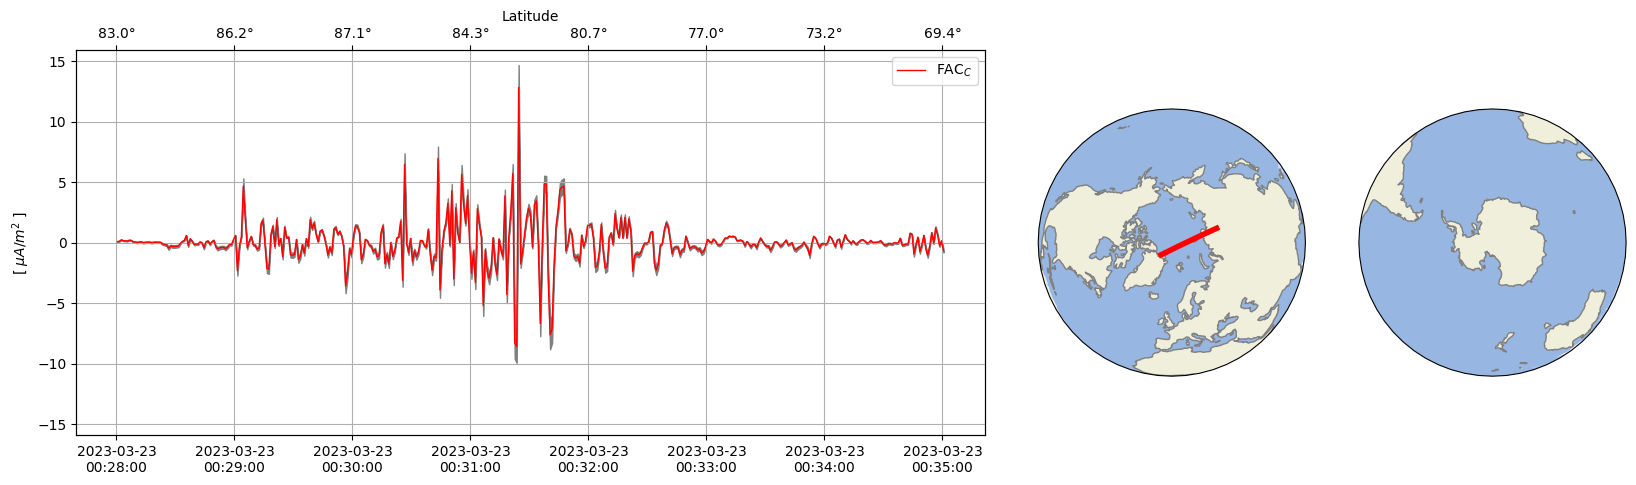

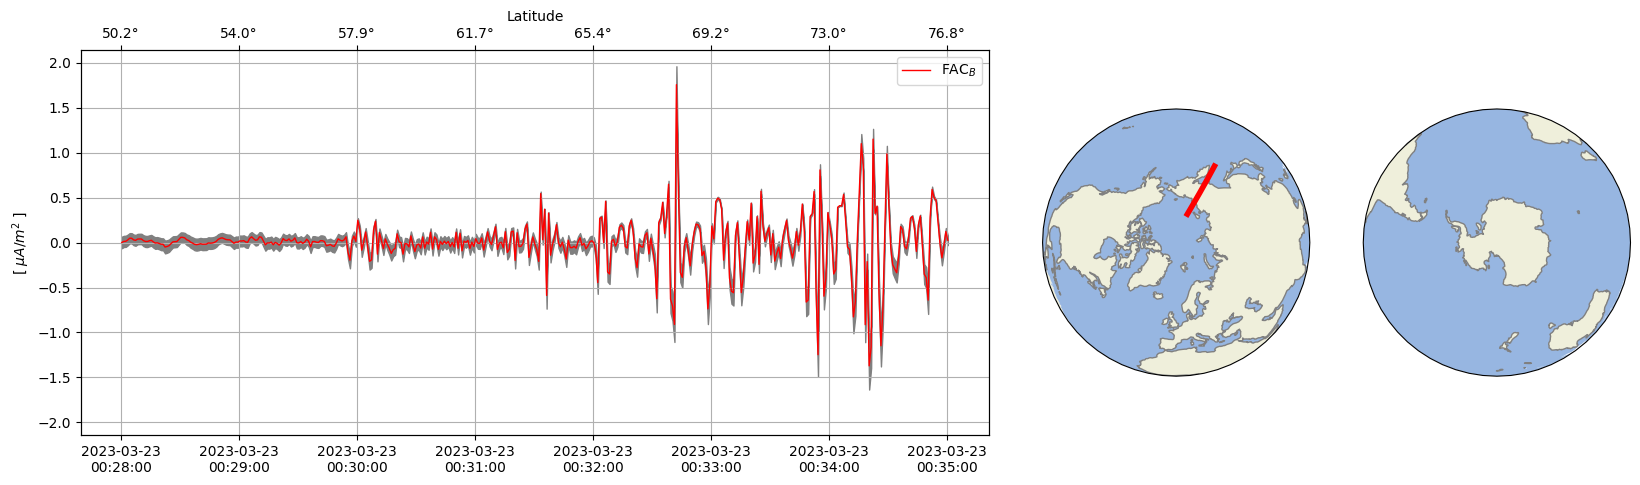

In [ ]:
def line_plot_figure(df, spacecraft="A", color="red"):
    """Generate a figure containing both line plot and maps"""
    df = df.copy()
    df = df.where(df["Spacecraft"] == spacecraft).dropna()
    # Set up figure geometry together with North/South maps
    fig = plt.figure(figsize=(20, 5))
    ax_lineplot = plt.subplot2grid((1, 5), (0, 0), colspan=3, fig=fig)
    ax_N = plt.subplot2grid((1, 5), (0, 3), fig=fig,
        projection=ccrs.Orthographic(
            central_longitude=0.0, central_latitude=90.0
        ))
    ax_S = plt.subplot2grid((1, 5), (0, 4), fig=fig,
        projection=ccrs.Orthographic(
            central_longitude=0.0, central_latitude=-90.0
        ))
    for _ax in (ax_N, ax_S):
        _ax.set_global()
        _ax.coastlines(color="grey")
        _ax.add_feature(cfeature.LAND)
        _ax.add_feature(cfeature.OCEAN)
        _ax.plot(df["Longitude"], df["Latitude"], transform=ccrs.PlateCarree(),
                 linewidth=4, color=color)
    # Draw the line plot as before
    line_plot(fig, ax_lineplot, df, spacecraft=spacecraft, color=color)

line_plot_figure(df_subset, spacecraft="A", color="red")
line_plot_figure(df_subset, spacecraft="C", color="red")
line_plot_figure(df_subset, spacecraft="B", color="red")

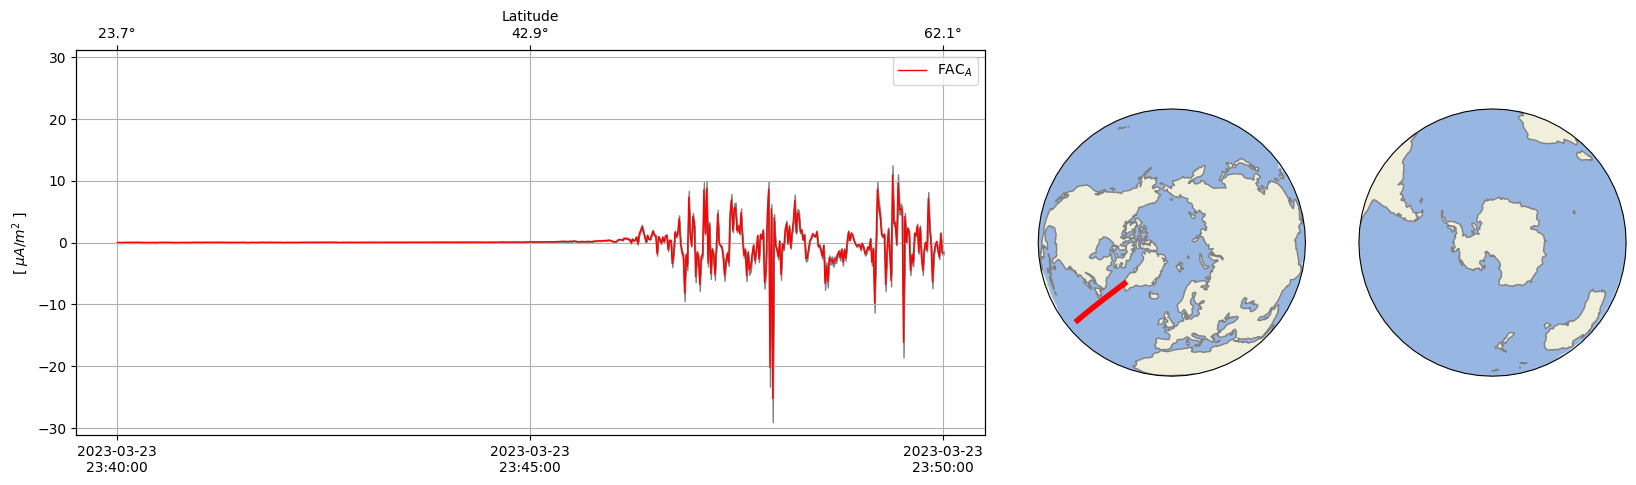

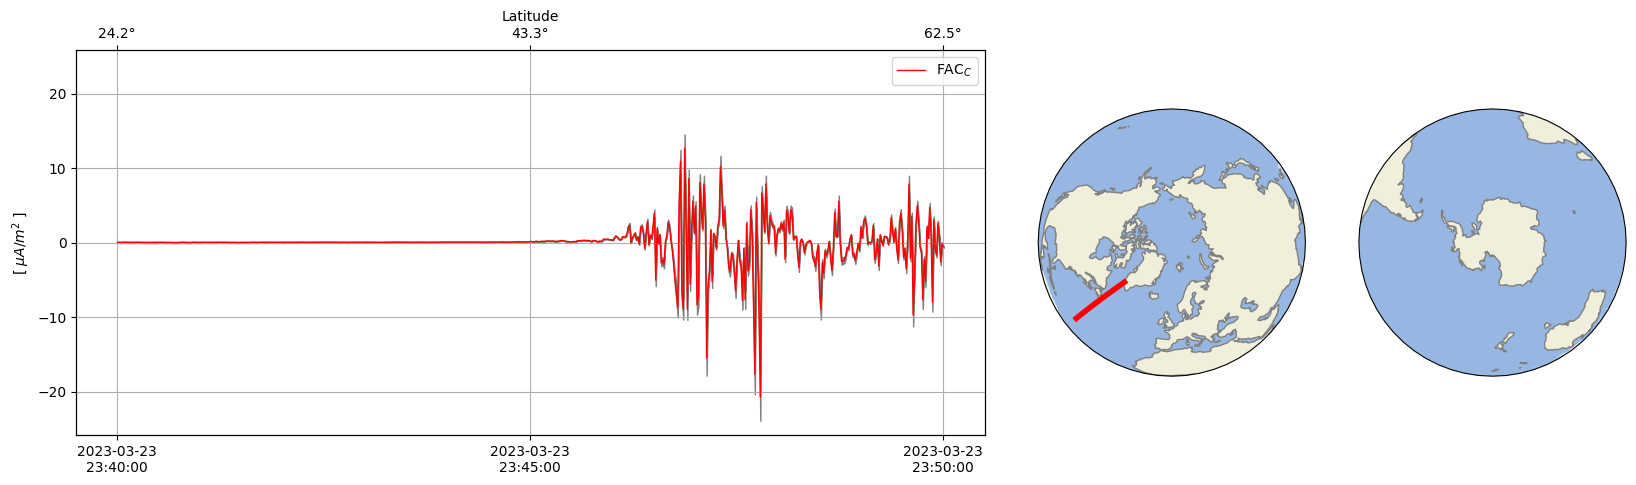

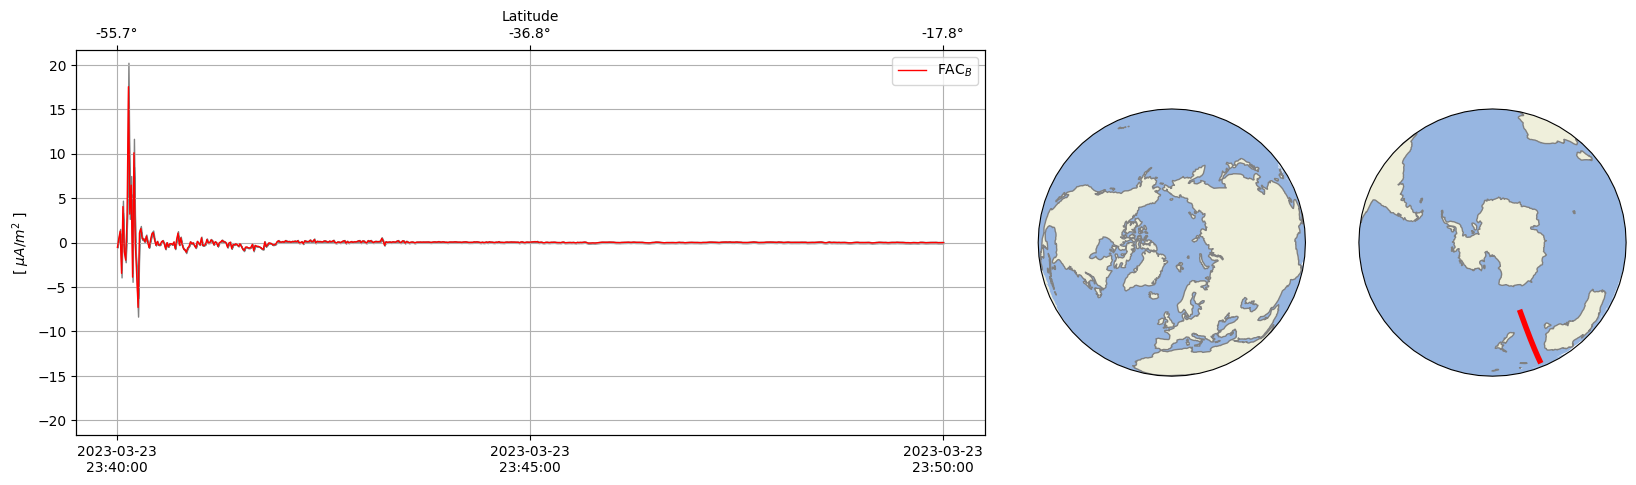

In [ ]:
df_subset = df['2023-03-23T23:40:00':'2023-03-23T23:50:00']
def line_plot_figure(df, spacecraft="A", color="red"):
    """Generate a figure containing both line plot and maps"""
    df = df.copy()
    df = df.where(df["Spacecraft"] == spacecraft).dropna()
    # Set up figure geometry together with North/South maps
    fig = plt.figure(figsize=(20, 5))
    ax_lineplot = plt.subplot2grid((1, 5), (0, 0), colspan=3, fig=fig)
    ax_N = plt.subplot2grid((1, 5), (0, 3), fig=fig,
        projection=ccrs.Orthographic(
            central_longitude=0.0, central_latitude=90.0
        ))
    ax_S = plt.subplot2grid((1, 5), (0, 4), fig=fig,
        projection=ccrs.Orthographic(
            central_longitude=0.0, central_latitude=-90.0
        ))
    for _ax in (ax_N, ax_S):
        _ax.set_global()
        _ax.coastlines(color="grey")
        _ax.add_feature(cfeature.LAND)
        _ax.add_feature(cfeature.OCEAN)
        _ax.plot(df["Longitude"], df["Latitude"], transform=ccrs.PlateCarree(),
                 linewidth=4, color=color)
    # Draw the line plot as before
    line_plot(fig, ax_lineplot, df, spacecraft=spacecraft, color=color)

line_plot_figure(df_subset, spacecraft="A", color="red")
line_plot_figure(df_subset, spacecraft="C", color="red")
line_plot_figure(df_subset, spacecraft="B", color="red")

# EFIxTIE (Ion temperatures)
Access to the EFIxTIE data product containing estimates of the O+ ion temperature in the upper F region along Swarm orbits.

In [ ]:
import datetime as dt
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
# Control the HTML display of the datasets
xr.set_options(display_expand_attrs=False, display_expand_coords=True, display_expand_data=True)

from viresclient import SwarmRequest

In [ ]:
SERVER_URL = 'https://vires.services/ows'
request = SwarmRequest(SERVER_URL)

In [ ]:
request.available_collections("EFI_TIE", details=False)

{'EFI_TIE': ['SW_OPER_EFIATIE_2_', 'SW_OPER_EFIBTIE_2_', 'SW_OPER_EFICTIE_2_']}

In [ ]:
tie_vars = [
    # Positional information in geodetic (GD) and geocentric (GC) frames
    #  redundant with VirES variables Latitude, Longitude, Radius (in geocentric frame)
    "Latitude_GD", "Longitude_GD", "Height_GD", "Radius_GC",
    # Quasi-dipole magnetic latitude and local time
    #  redundant with VirES auxiliaries, QDLat & MLT
    "Latitude_QD", "MLT_QD",
    # Neutral temperature from NRLMSISE-00 model
    "Tn_msis",
    # Corrected Swarm LP electron temperature
    "Te_adj_LP",
    # Estimated ion temperature from TII drift at high latitudes
    "Ti_meas_drift",
    # Estimated Ion temperature from Weimer 2005 model drifts at high latitudes
    "Ti_model_drift",
    # Bitwise flags with process information
    #  See the Product definition document for details
    "Flag_ti_meas", "Flag_ti_model"
]
start = dt.datetime(2023, 3, 23, 0, 0, 0)
end = dt.datetime(2023, 3, 23, 3, 51, 25)

request = SwarmRequest(SERVER_URL)
request.set_collection("SW_OPER_EFIATIE_2_")
request.set_products(
    measurements=tie_vars,
    auxiliaries=["OrbitNumber", "OrbitDirection", "MLT"]
)
data = request.get_between(start, end)

Processing:  100%|██████████|  [ Elapsed: 00:02, Remaining: 00:00 ] [1/1] 
Downloading: 100%|██████████|  [ Elapsed: 00:00, Remaining: 00:00 ] (3.539MB)


In [ ]:
ds = data.as_xarray()


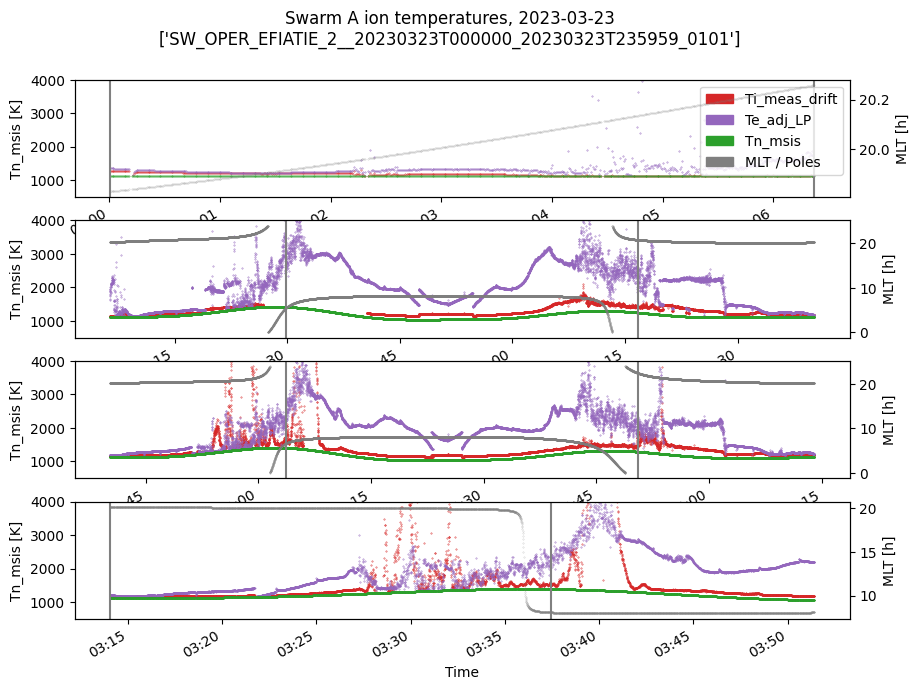

In [ ]:
# Set up a time series plot where each row is an orbit
nrows = len(np.unique(ds["OrbitNumber"]))
fig, axes = plt.subplots(nrows=nrows, ncols=1, figsize=(10, 7))
axes_r = [ax.twinx() for ax in axes]
for i, (orbitnumber, ds_orbit) in enumerate(ds.groupby("OrbitNumber")):
    # Plot electron & ion temperatures, measured and modelled
    ds_orbit.plot.scatter(x="Timestamp", y="Ti_meas_drift", s=0.1, ax=axes[i], color="tab:red")
    ds_orbit.plot.scatter(x="Timestamp", y="Te_adj_LP", s=0.1, ax=axes[i], color="tab:purple")
    ds_orbit.plot.scatter(x="Timestamp", y="Tn_msis", s=0.1, ax=axes[i], color="tab:green")
    ds_orbit.plot.scatter(x="Timestamp", y="MLT", s=0.05, ax=axes_r[i], color="tab:gray", alpha=0.5)
    # Identify times closest to North and South pole
    t_NP = ds_orbit["Timestamp"].isel(Timestamp=ds_orbit["Latitude"].argmax()).values
    t_SP = ds_orbit["Timestamp"].isel(Timestamp=ds_orbit["Latitude"].argmin()).values
    axes[i].axvline(mpl.dates.date2num(t_NP), color="gray")
    axes[i].axvline(mpl.dates.date2num(t_SP), color="gray")
    # Tidy up labelling
    axes[i].xaxis.set_major_formatter(mpl.dates.DateFormatter("%H:%M"))
    axes[i].set_xlabel("")
# Add legend manually
red = mpl.patches.Patch(color="tab:red", label="Ti_meas_drift")
purple = mpl.patches.Patch(color="tab:purple", label="Te_adj_LP")
green = mpl.patches.Patch(color="tab:green", label="Tn_msis")
gray = mpl.patches.Patch(color="tab:gray", label="MLT / Poles")
axes[0].legend(handles=[red, purple, green, gray])
# Tidy up axes and labelling
for ax in axes:
    ax.set_ylim(500, 4000)
axes[-1].set_xlabel("Time")
title = "".join([
    f"Swarm {ds['Spacecraft'].data[0]} ion temperatures, ",
    ds["Timestamp"].dt.date.data[0].isoformat(),
    f"\n{[s for s in ds.attrs['Sources'] if 'TIE' in s]}"
])
fig.suptitle(title);

# EFIxTCT (Cross-track ion flow)

In [ ]:
tct_vars = [
    # Satellite velocity in NEC frame
    "VsatC", "VsatE", "VsatN",
    # Geomagnetic field components derived from 1Hz product
    #  (in satellite-track coordinates)
    "Bx", "By", "Bz",
    # Electric field components derived from -VxB with along-track ion drift
    #  (in satellite-track coordinates)
    # Eh: derived from horizontal sensor
    # Ev: derived from vertical sensor
    "Ehx", "Ehy", "Ehz",
    "Evx", "Evy", "Evz",
    # Ion drift corotation signal, removed from ion drift & electric field
    #  (in satellite-track coordinates)
    "Vicrx", "Vicry", "Vicrz",
    # Ion drifts along-track from vertical (..v) and horizontal (..h) TII sensor
    "Vixv", "Vixh",
    # Ion drifts cross-track (y from horizontal sensor, z from vertical sensor)
    #  (in satellite-track coordinates)
    "Viy", "Viz",
    # Random error estimates for the above
    #  (Negative value indicates no estimate available)
    "Vixv_error", "Vixh_error", "Viy_error", "Viz_error",
    # Quasi-dipole magnetic latitude and local time
    #  redundant with VirES auxiliaries, QDLat & MLT
    "Latitude_QD", "MLT_QD",
    # Refer to release notes link above for details:
    "Calibration_flags", "Quality_flags",
]

In [ ]:
start = "2023-03-23T00:00:00"
end = "2023-03-23T04:00:00"

request = SwarmRequest(SERVER_URL)
request.set_collection("SW_EXPT_EFIA_TCT02")
request.set_products(measurements=tct_vars)
data = request.get_between(start, end)

Processing:  100%|██████████|  [ Elapsed: 00:02, Remaining: 00:00 ] [1/1] 
Downloading: 100%|██████████|  [ Elapsed: 00:00, Remaining: 00:00 ] (3.279MB)


In [ ]:
ds = data.as_xarray()


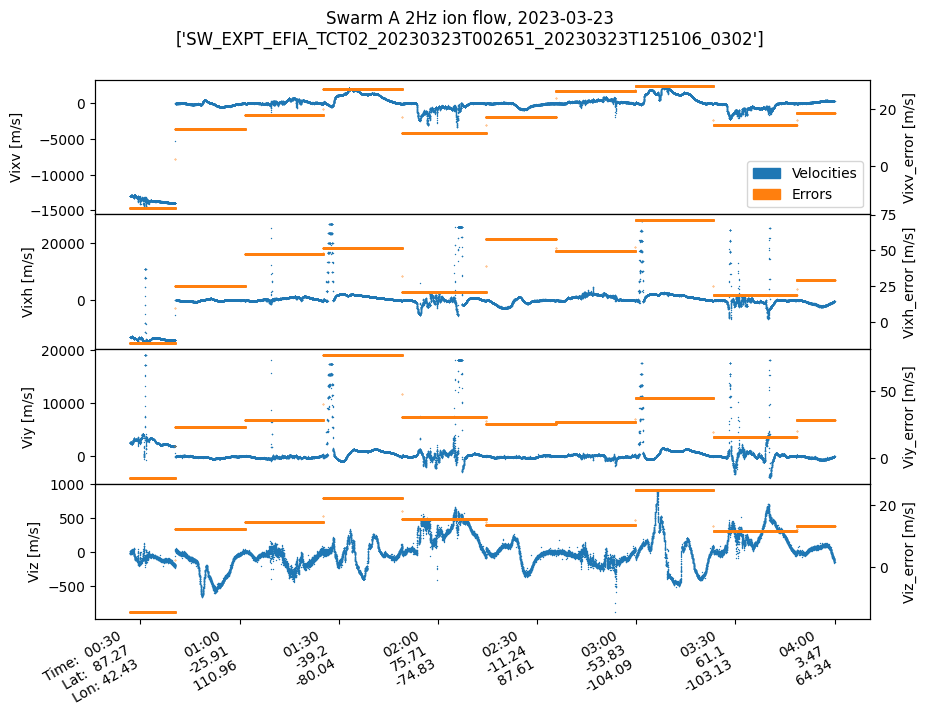

In [ ]:
fig, axes = plt.subplots(nrows=4, sharex=True, figsize=(10, 7))
# Plot velocities with left axis
ds.plot.scatter(x="Timestamp", y="Vixv", ax=axes[0], s=1, linewidths=0)
ds.plot.scatter(x="Timestamp", y="Vixh", ax=axes[1], s=1, linewidths=0)
ds.plot.scatter(x="Timestamp", y="Viy", ax=axes[2], s=1, linewidths=0)
ds.plot.scatter(x="Timestamp", y="Viz", ax=axes[3], s=1, linewidths=0, label="Velocities")
# Plot velocities with right axis
axes_r = [ax.twinx() for ax in axes]
ds.plot.scatter(x="Timestamp", y="Vixv_error", ax=axes_r[0], s=0.1, color="tab:orange")
ds.plot.scatter(x="Timestamp", y="Vixh_error", ax=axes_r[1], s=0.1, color="tab:orange")
ds.plot.scatter(x="Timestamp", y="Viy_error", ax=axes_r[2], s=0.1, color="tab:orange")
ds.plot.scatter(x="Timestamp", y="Viz_error", ax=axes_r[3], s=0.1, color="tab:orange")
fig.subplots_adjust(hspace=0)
# Add legend to identify each side
blue = mpl.patches.Patch(color="tab:blue", label="Velocities")
orange = mpl.patches.Patch(color="tab:orange", label="Errors")
axes[0].legend(handles=[blue, orange])
# # Generate additional ticklabels for x-axis
# Use time xticks to get dataset vars at those xticks
locx = axes[-1].get_xticks()
times = mpl.dates.num2date(locx)
times = [t.replace(tzinfo=None) for t in times]
_ds_xticks = ds.reindex({"Timestamp": times}, method="nearest")
# Build ticklabels from dataset vars
xticklabels = np.stack([
    _ds_xticks["Timestamp"].dt.strftime("%H:%M").values,
    np.round(_ds_xticks["Latitude"].values, 2).astype(str),
    np.round(_ds_xticks["Longitude"].values, 2).astype(str),
])
xticklabels = ["\n".join(row) for row in xticklabels.T]
# Add labels to first xtick
_xt0 = xticklabels[0].split("\n")
xticklabels[0] = f"Time:  {_xt0[0]}\nLat:  {_xt0[1]}\nLon: {_xt0[2]}"
axes[-1].set_xticks(axes[-1].get_xticks())
axes[-1].set_xticklabels(xticklabels)
axes[-1].set_xlabel("")
# Adjust title
title = "".join([
    f"Swarm {ds['Spacecraft'].data[0]} 2Hz ion flow, ",
    ds["Timestamp"].dt.date.data[0].isoformat(),
    f"\n{ds.attrs['Sources']}"
])
fig.suptitle(title);

# Temporal coverage

In [ ]:

from viresclient._wps.time_util import parse_datetime
from viresclient import set_token
set_token("https://vires.services/ows", set_default=True)
from viresclient import SwarmRequest
import datetime as dt
import matplotlib.pyplot as plt

request = SwarmRequest()
#GAuzpjyWJH7w1jBK2kYM-Zn7FlVdGSgd


Setting access token for https://vires.services/ows  ...
Generate a token at https://vires.services/accounts/tokens/
Enter token:··········
Token saved for https://vires.services/ows


In [ ]:
TIME = '2023-03-23T01:00:00Z'
TIME_MIN = '2023-03-20T00:00:00Z'
TIME_MAX = '2023-03-28T00:00:00Z'

SPACECRAFT = 'A'
SERVER_URL='https://vires.services/ows'
request = SwarmRequest(SERVER_URL)

# get orbit for the given time
orbit_number = request.get_orbit_number(SPACECRAFT, parse_datetime(TIME))

In [ ]:

# get orbit for the given time
orbit_number = request.get_orbit_number(SPACECRAFT, parse_datetime(TIME))
start_time, end_time =  request.get_times_for_orbits(orbit_number, orbit_number, spacecraft=SPACECRAFT)
print('Spacecraft:     ', SPACECRAFT)
print('Orbit number:   ', orbit_number)
print('Start time:     ', start_time)
print('End time:       ', end_time)

collection_2Hz = 'SW_EXPT_EFI{}_TCT02'.format(SPACECRAFT)
print('Collection 2Hz: ', collection_2Hz)

collection_16Hz = 'SW_EXPT_EFI{}_TCT16'.format(SPACECRAFT)
print('Collection 16Hz:', collection_16Hz)

Spacecraft:      A
Orbit number:    52468
Start time:      2023-03-23 00:06:22.656022
End time:        2023-03-23 01:40:12.441015
Collection 2Hz:  SW_EXPT_EFIA_TCT02
Collection 16Hz: SW_EXPT_EFIA_TCT16


In [ ]:
# retrieve temporal coverage

request.set_collection(collection_2Hz)
request.set_products(
    measurements=[],
    sampling_step='PT5M',
)
locations_2Hz = request.get_between(
    start_time=TIME_MIN,
    end_time=TIME_MAX,
    asynchronous=True,
).as_xarray()

request.set_collection(collection_16Hz)
request.set_products(
    measurements=[],
    sampling_step='PT5M',
)
locations_16Hz = request.get_between(
    start_time=TIME_MIN,
    end_time=TIME_MAX,
    asynchronous=True,
).as_xarray()

Processing:  100%|██████████|  [ Elapsed: 00:02, Remaining: 00:00 ] [1/1] 
Downloading: 100%|██████████|  [ Elapsed: 00:00, Remaining: 00:00 ] (0.057MB)
Processing:  100%|██████████|  [ Elapsed: 00:02, Remaining: 00:00 ] [1/1] 
Downloading: 100%|██████████|  [ Elapsed: 00:00, Remaining: 00:00 ] (0.057MB)


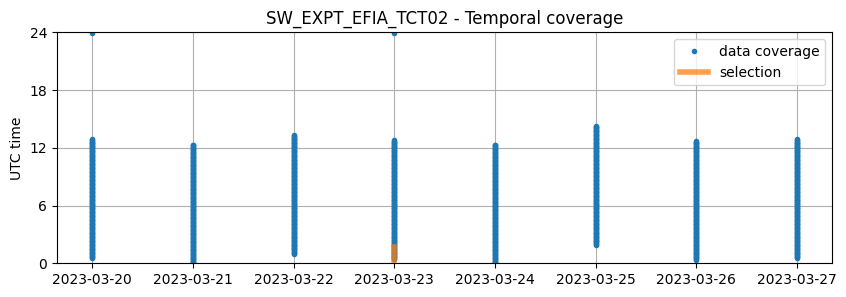

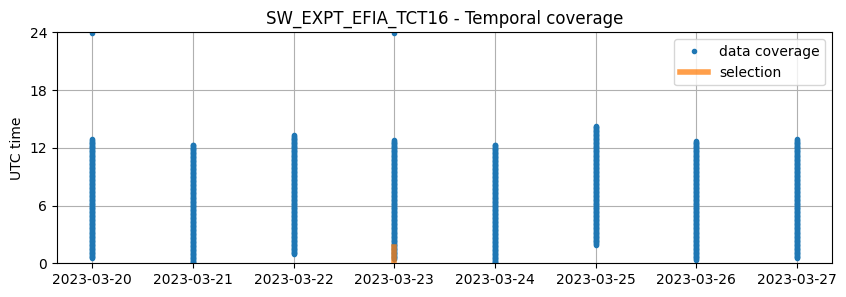

In [ ]:
# plot temporal coverage

from numpy import array, arange
from matplotlib.pyplot import subplot, figure

def split_time(times):
    "Split time to date and time in hours."
    days = times.astype('datetime64[D]')
    return days, (times.astype('datetime64[s]') - days).astype('int')/3600

def as_time_array(start, end):
    return array([start, end], 'datetime64[s]')

def split_segments(days, times):
    if times[1] < times[0]:
        return [
            (days[[0, 0]], array([times[0], 24])),
            (days[[1, 1]], array([0, times[1]])),
        ]
    return [(days, times)]


def plot_temporal_coverage(data, collection):
    fig = figure(figsize=(10, 3), dpi=100)
    ax = subplot(1, 1, 1)
    times = data['Timestamp'].values
    ax.set_title("{} - Temporal coverage".format(collection))
    h_data, = ax.plot(*split_time(times), '.')
    for segment in split_segments(*split_time(as_time_array(start_time, end_time))):
        h_selection, = ax.plot(*segment, '-', c='tab:orange', lw=4, alpha=0.75)
    ax.set_ylim(0, 24)
    ax.set_yticks([0, 6, 12, 18, 24])
    ax.set_ylabel("UTC time")
    ax.grid()
    ax.legend([h_data, h_selection], ["data coverage", "selection"])


plot_temporal_coverage(locations_2Hz, collection_2Hz)
plot_temporal_coverage(locations_16Hz, collection_16Hz)

In [ ]:
locations_2Hz

<xarray.Dataset>
Dimensions:     (Timestamp: 1194)
Coordinates:
  * Timestamp   (Timestamp) datetime64[ns] 2023-03-20T00:31:51.225250048 ... ...
Data variables:
    Spacecraft  (Timestamp) object 'A' 'A' 'A' 'A' 'A' ... 'A' 'A' 'A' 'A' 'A'
    Radius      (Timestamp) float32 6.827e+06 6.827e+06 ... 6.839e+06 6.842e+06
    Longitude   (Timestamp) float32 -37.83 107.7 114.0 ... -72.83 -73.15 -73.49
    Latitude    (Timestamp) float32 82.7 77.3 58.24 39.07 ... 20.53 1.349 -17.81
Attributes:
    Sources:         ['SW_EXPT_EFIA_TCT02_20230320T003151_20230320T125606_030...
    MagneticModels:  []
    AppliedFilters:  []

# 2D data bining and plot

In [ ]:
# data retrieval
SERVER_URL = "https://vires.services/ows"
SPACECRAFT = 'A'
START_TIME = "2023-03-02T00:00:00Z"
END_TIME = "2023-03-30T23:00:00Z"
MIT_LP_TE_PEAK = 0x6

def _insert(list_, value):
    if value not in list_:
        list_.apped(value)

request = SwarmRequest(SERVER_URL)
request.set_collection(f"SW_OPER_MOD{SPACECRAFT}_SC_1B")
request.set_products(
    measurements=[],
    auxiliaries=['QDLat', 'Kp'],
    sampling_step="PT10S"
)
data_track = request.get_between(
    start_time=START_TIME,
    end_time=END_TIME,
    asynchronous=True,
).as_xarray()
print(data_track)

request = SwarmRequest(SERVER_URL)
request.set_collection(f"SW_OPER_EFI{SPACECRAFT}_LP_1B")
request.set_products(
    measurements=['Ne', 'Te'],
    auxiliaries=['QDLat', 'QDOrbitDirection'],
    #sampling_step="PT5S"
)
data_efi = request.get_between(
    start_time=START_TIME,
    end_time=END_TIME,
    asynchronous=True,
).as_xarray()
print(data_efi)

request = SwarmRequest(SERVER_URL)
request.set_collection(f"SW_OPER_MIT{SPACECRAFT}_LP_2F")
request.set_products(
    measurements=[],
    auxiliaries=['QDLat', 'QDOrbitDirection'],
)
data_ne_min = request.get_between(
    start_time=START_TIME,
    end_time=END_TIME,
    asynchronous=False,
).as_xarray()
print(data_ne_min)

request = SwarmRequest(SERVER_URL)
request.set_collection(f"SW_OPER_MIT{SPACECRAFT}_LP_2F:ID")
request.set_products(
    measurements=['PointType'],
    auxiliaries=['QDLat', 'QDOrbitDirection'],
)
request.set_range_filter('PointType', MIT_LP_TE_PEAK, MIT_LP_TE_PEAK)
data_te_peak = request.get_between(
    start_time=START_TIME,
    end_time=END_TIME,
    asynchronous=False,
).as_xarray()
print(data_te_peak)
assert (data_te_peak['PointType'].values == MIT_LP_TE_PEAK).all()

#...........'
request = SwarmRequest(SERVER_URL)
request.set_collection("SW_OPER_IPDAIRR_2F")
request.set_products(measurements=['Ne', 'mVTEC'],
                     auxiliaries=['QDLat', 'MLT', 'QDOrbitDirection'],)
data_IPDA = request.get_between(
    start_time=START_TIME,
    end_time=END_TIME,
    asynchronous=True,
).as_xarray()

request = SwarmRequest(SERVER_URL)
request.set_collection("SW_OPER_IPDAIRR_2F")
request.set_products(
    measurements=[],
    auxiliaries=['QDLat', 'QDOrbitDirection'],
)
data_tec = request.get_between(
    start_time=START_TIME,
    end_time=END_TIME,
).as_xarray()

Processing:  100%|██████████|  [ Elapsed: 00:02, Remaining: 00:00 ] [1/1] 
Downloading: 100%|██████████|  [ Elapsed: 00:00, Remaining: 00:00 ] (12.273MB)


<xarray.Dataset> Size: 14MB
Dimensions:     (Timestamp: 250200)
Coordinates:
  * Timestamp   (Timestamp) datetime64[ns] 2MB 2023-03-02 ... 2023-03-30T22:5...
Data variables:
    Spacecraft  (Timestamp) object 2MB 'A' 'A' 'A' 'A' 'A' ... 'A' 'A' 'A' 'A'
    QDLat       (Timestamp) float64 2MB -76.58 -77.05 -77.5 ... 26.55 27.25
    Radius      (Timestamp) float64 2MB 6.847e+06 6.847e+06 ... 6.834e+06
    Longitude   (Timestamp) float64 2MB 159.4 159.6 159.8 ... -49.66 -49.66
    Kp          (Timestamp) float64 2MB 2.0 2.0 2.0 2.0 ... 2.667 2.667 2.667
    Latitude    (Timestamp) float64 2MB -67.82 -68.46 -69.09 ... 26.06 26.7
Attributes:
    Sources:         ['GFZ_KP_20230101T013000_20231231T223000_20240109T013302...
    MagneticModels:  []
    AppliedFilters:  []


Processing chunks [1/2]:           |  [ Elapsed: 00:00, Remaining: ?]  , (> 0.0 MB)
Processing:    0%|          |  [ Elapsed: 00:00, Remaining: ? ] [1/2] 
Processing:    4%|▍         |  [ Elapsed: 00:01, Remaining: 00:29 ] [1/2] 
Processing:   20%|██        |  [ Elapsed: 00:02, Remaining: 00:08 ] [1/2] 
Processing:   32%|███▏      |  [ Elapsed: 00:03, Remaining: 00:06 ] [1/2] 
Processing:   48%|████▊     |  [ Elapsed: 00:04, Remaining: 00:04 ] [1/2] 
Processing:   60%|██████    |  [ Elapsed: 00:05, Remaining: 00:03 ] [1/2] 
Processing:   76%|███████▌  |  [ Elapsed: 00:06, Remaining: 00:01 ] [1/2] 
Processing:   88%|████████▊ |  [ Elapsed: 00:07, Remaining: 00:01 ] [1/2] 
Processing:  100%|██████████|  [ Elapsed: 00:08, Remaining: 00:00 ] [1/2] 

Downloading:   0%|          |  [ Elapsed: 00:00, Remaining: ? ] (250.502MB)
Downloading:   1%|▏         |  [ Elapsed: 00:00, Remaining: 00:06 ] (250.502MB)
Downloading:   6%|▌         |  [ Elapsed: 00:00, Remaining: 00:02 ] (250.502MB)
Download

<xarray.Dataset> Size: 325MB
Dimensions:           (Timestamp: 5002624)
Coordinates:
  * Timestamp         (Timestamp) datetime64[ns] 40MB 2023-03-02T00:00:00.197...
Data variables:
    Spacecraft        (Timestamp) object 40MB 'A' 'A' 'A' 'A' ... 'A' 'A' 'A'
    QDLat             (Timestamp) float64 40MB -76.59 -76.61 ... 27.89 27.93
    Radius            (Timestamp) float64 40MB 6.847e+06 6.847e+06 ... 6.834e+06
    QDOrbitDirection  (Timestamp) int8 5MB -1 -1 -1 -1 -1 -1 -1 ... 1 1 1 1 1 1
    Te                (Timestamp) float64 40MB 3.132e+03 2.95e+03 ... 1.605e+03
    Longitude         (Timestamp) float64 40MB 159.4 159.4 ... -49.67 -49.67
    Ne                (Timestamp) float64 40MB 3.566e+05 3.577e+05 ... 8.207e+05
    Latitude          (Timestamp) float64 40MB -67.83 -67.87 ... 27.28 27.32
Attributes:
    Sources:         ['SW_OPER_EFIA_LP_1B_20230302T000000_20230302T235959_060...
    MagneticModels:  []
    AppliedFilters:  []


Downloading: 100%|██████████|  [ Elapsed: 00:00, Remaining: 00:00 ] (0.066MB)


<xarray.Dataset> Size: 29kB
Dimensions:           (Timestamp: 587)
Coordinates:
  * Timestamp         (Timestamp) datetime64[ns] 5kB 2023-03-02T00:08:45.1970...
Data variables:
    Spacecraft        (Timestamp) object 5kB 'A' 'A' 'A' 'A' ... 'A' 'A' 'A' 'A'
    QDLat             (Timestamp) float64 5kB -64.4 61.71 ... 57.32 -60.31
    Radius            (Timestamp) float64 5kB 6.848e+06 6.831e+06 ... 6.846e+06
    QDOrbitDirection  (Timestamp) int8 587B 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1
    Longitude         (Timestamp) float64 5kB -42.09 -33.73 ... -25.31 -53.72
    Latitude          (Timestamp) float64 5kB -78.26 60.3 -79.94 ... 57.53 -74.1
Attributes:
    Sources:         ['SW_OPER_MITA_LP_2F_20230101T000000_20231231T235959_020...
    MagneticModels:  []
    AppliedFilters:  []


Downloading: 100%|██████████|  [ Elapsed: 00:00, Remaining: 00:00 ] (0.075MB)


<xarray.Dataset> Size: 21kB
Dimensions:           (Timestamp: 425)
Coordinates:
  * Timestamp         (Timestamp) datetime64[ns] 3kB 2023-03-02T00:44:59.1970...
Data variables:
    Spacecraft        (Timestamp) object 3kB 'A' 'A' 'A' 'A' ... 'A' 'A' 'A' 'A'
    QDLat             (Timestamp) float64 3kB 61.68 -65.9 64.23 ... 57.03 -58.32
    Radius            (Timestamp) float64 3kB 6.831e+06 6.848e+06 ... 6.846e+06
    QDOrbitDirection  (Timestamp) int8 425B 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1
    PointType         (Timestamp) uint8 425B 6 6 6 6 6 6 6 6 ... 6 6 6 6 6 6 6 6
    Longitude         (Timestamp) float64 3kB -33.74 -68.37 ... -25.33 -52.61
    Latitude          (Timestamp) float64 3kB 60.26 -80.31 58.77 ... 57.28 -71.8
Attributes:
    Sources:         ['SW_OPER_MITA_LP_2F_20230101T000000_20231231T235959_020...
    MagneticModels:  []
    AppliedFilters:  ['PointType <= 6', 'PointType >= 6']


Processing:  100%|██████████|  [ Elapsed: 00:06, Remaining: 00:00 ] [1/1] 
Downloading: 100%|██████████|  [ Elapsed: 00:01, Remaining: 00:00 ] (165.151MB)
Processing:  100%|██████████|  [ Elapsed: 00:05, Remaining: 00:00 ] [1/1] 
Downloading: 100%|██████████|  [ Elapsed: 00:00, Remaining: 00:00 ] (105.1MB)


In [ ]:
# 2D data binning
from math import ceil
from numpy import stack, asarray, linspace, timedelta64
from scipy.stats import binned_statistic_2d
from viresclient._wps.time_util import parse_duration
%matplotlib inline


def _orbit_latitude(latitude, orbit_direction):
    " unwrap latitude along the orbit "
    orbit_latitude = latitude.copy()
    mask = orbit_direction == -1
    orbit_latitude[mask] = 180 - latitude[mask]
    orbit_latitude[orbit_latitude > 180] -= 360
    return orbit_latitude


def datetime64_to_number(precision, scale=1.0, offset=0.0):
    """ get datetime64 to number convertor. """
    def _datetime64_to_number(data):
        return (asarray(data).astype(f'datetime64[{precision}]').astype('int64') - offset)*scale
    return _datetime64_to_number


def number_to_datetime64(precision, scale=1.0, offset=0.0):
    """ get number to datetime64 convertor. """
    def _number_to_datetime64(data):
        return (asarray(data)/scale + offset).astype('int64').astype(f'datetime64[{precision}]')
    return _number_to_datetime64


def timedelta64_to_number(precision, scale=1.0):
    """ get datetime64 to number convertor. """
    def _datetime64_to_number(data):
        return asarray(data).astype(f'timedelta64[{precision}]').astype('int64')*scale
    return _datetime64_to_number


def number_to_timedelta64(precision, scale=1.0, offset=0.0):
    """ get number to datetime64 convertor. """
    def _number_to_timedelta64(data):
        return (asarray(data)/scale).astype('int64').astype(f'timedelta64[{precision}]')
    return _number_to_timedelta64


from_time = datetime64_to_number('us', 1e-6)
to_time = number_to_datetime64('us', 1e-6)
from_tdelta = timedelta64_to_number('us', 1e-6)
to_tdelta = number_to_timedelta64('us', 1e-6)


def bin_data_2d(t, l, v, tstep, lstep, statistic='max'):
    """ bin data into a 2D time vs latitude array """
    def _get_bins(start, end, step):
        nstep = abs(int(ceil((end - start)/step)))
        return linspace(start, end, nstep)

    tbins = _get_bins(from_time(START_TIME), from_time(END_TIME), from_tdelta(tstep))
    lbins = _get_bins(-180, 180, lstep)

    vb, tb, lb, _ = binned_statistic_2d(
        from_time(t), l, v,
        statistic=statistic,
        bins=(tbins, lbins),
    )

    return vb.transpose(), to_time(tb), lb
from numpy import datetime64
from matplotlib.pyplot import figure, subplot, show, colorbar
import matplotlib.cm as color_map
from matplotlib.colors import Normalize, LogNorm
%matplotlib inline

start_time, end_time = datetime64(START_TIME), datetime64(END_TIME)


def align_axes_horizontally(ax, ax_ref):
    pos_ref = ax_ref.get_position()
    pos = ax.get_position()
    ax.set_position([pos_ref.x0, pos.y0, pos_ref.width, pos.height])


def _orbit_latitude(latitude, orbit_direction):
    " unwrap latitude along the orbit "
    orbit_latitude = latitude.copy()
    mask = orbit_direction == -1
    orbit_latitude[mask] = 180 - latitude[mask]
    orbit_latitude[orbit_latitude > 180] -= 360
    return orbit_latitude


def _periodic_qd_plot(ax, is_north):
    if is_north:
        ylim = [30, 150]
        yticks = [30, 45, 60, 75, 90, 105, 120, 135, 150]
        ylabels = ['+30\u00B0\u2191', '+45\u00B0\u2191', '+60\u00B0\u2191', '+75\u00B0\u2191', '+90\u00B0', '+75\u00B0\u2193', '+60\u00B0\u2193', '+45\u00B0\u2193', '+30\u00B0\u2193']
    else:
        ylim = [-150, -30]
        yticks = [-150, -135, -120, -105, -90, -75, -60, -45, -30]
        ylabels = ['\u221230\u00B0\u2193', '\u221245\u00B0\u2193', '\u221260\u00B0\u2193', '\u221275\u00B0\u2193', '\u221290\u00B0', '\u221275\u00B0\u2191', '\u221260\u00B0\u2191', '\u221245\u00B0\u2191', '\u221230\u00B0\u2191']
    ax.set_ylim(ylim)
    ax.set_yticks(yticks)
    ax.set_yticklabels(ylabels)


def plot_kp(ax):
    ax.fill_between(data_track['Timestamp'].values, data_track['Kp'].values, color='tab:red', alpha=0.25)
    h_kp, = ax.plot(data_track['Timestamp'].values, data_track['Kp'].values, '-', color='tab:red')
    ax.set_ylim([-0.5, 8.5])
    ax.set_ylabel("Kp index")
    ax.set_xlim(start_time, end_time)
    ax.grid()
    return ax

<ipython-input-10-7046ddec5d81>:74: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  start_time, end_time = datetime64(START_TIME), datetime64(END_TIME)


<ipython-input-19-4919299963b0>:21: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  return (asarray(data).astype(f'datetime64[{precision}]').astype('int64') - offset)*scale


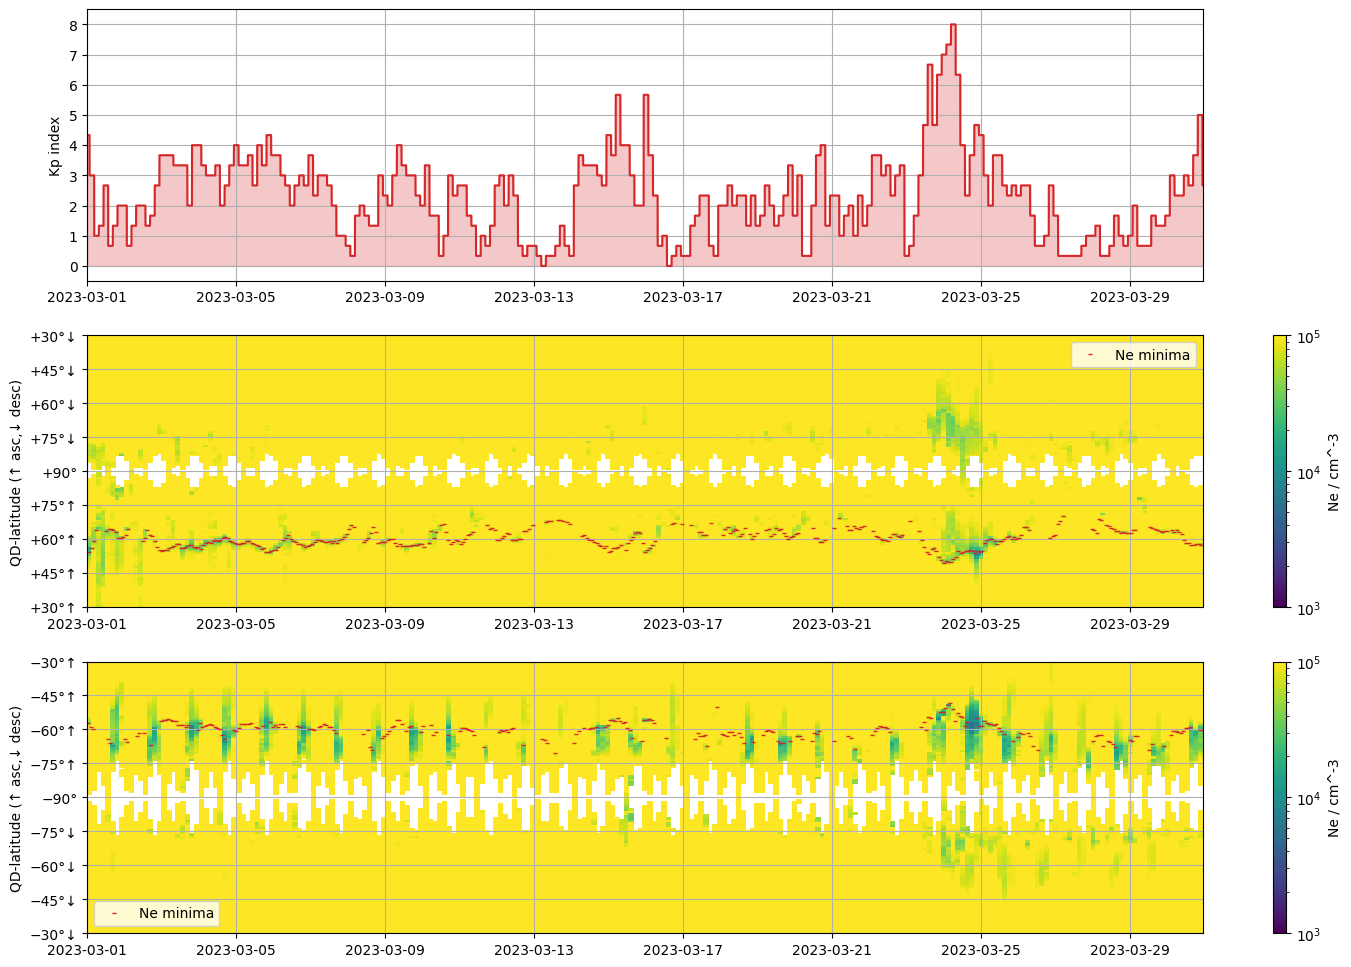

In [ ]:
def plot_log_ne(ax, is_north=True):
    im = ax.pcolor(time_ne_bin, lat_qd_orb_ne_bin, values_ne_bin, norm=LogNorm(vmin=ne_min, vmax=ne_max))
    cax = colorbar(im)
    cax.set_label('Ne / cm^-3')
    h_min, = ax.plot(time_ne_min, lat_qd_ne_min, '_', c='tab:red', ms=2.5)
    ax.legend([h_min], ["Ne minima"])
    ax.grid()
    ax.set_ylabel('QD-latitude (\u2191 asc,\u2193 desc)')
    ax.set_xlim(start_time, end_time)
    _periodic_qd_plot(ax, is_north)
    return ax

# data preparation
time_ne_min = data_ne_min['Timestamp'].values
lat_qd_ne_min = _orbit_latitude(
    data_ne_min['QDLat'],
    data_ne_min['QDOrbitDirection'],
)

time_ne = data_efi['Timestamp'].values
lat_qd_orb_ne = _orbit_latitude(
    data_efi['QDLat'],
    data_efi['QDOrbitDirection'],
)
values_ne = data_efi['Ne'].values

# data binning
values_ne_bin, time_ne_bin, lat_qd_orb_ne_bin = bin_data_2d(
    time_ne,
    lat_qd_orb_ne,
    values_ne,
    tstep=parse_duration('P3H'),
    lstep=1, # deg
    statistic='median',
)

# plotting
ne_min, ne_max = 1e3, 1e5

fig = figure(figsize=(18, 12), dpi=100)

ax_kp = plot_kp(subplot(311))
ax_ne_n = plot_log_ne(subplot(312), is_north=True)
ax_ne_s = plot_log_ne(subplot(313), is_north=False)


align_axes_horizontally(ax_ne_s, ax_ne_n)
align_axes_horizontally(ax_kp, ax_ne_n)

<ipython-input-19-4919299963b0>:21: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  return (asarray(data).astype(f'datetime64[{precision}]').astype('int64') - offset)*scale


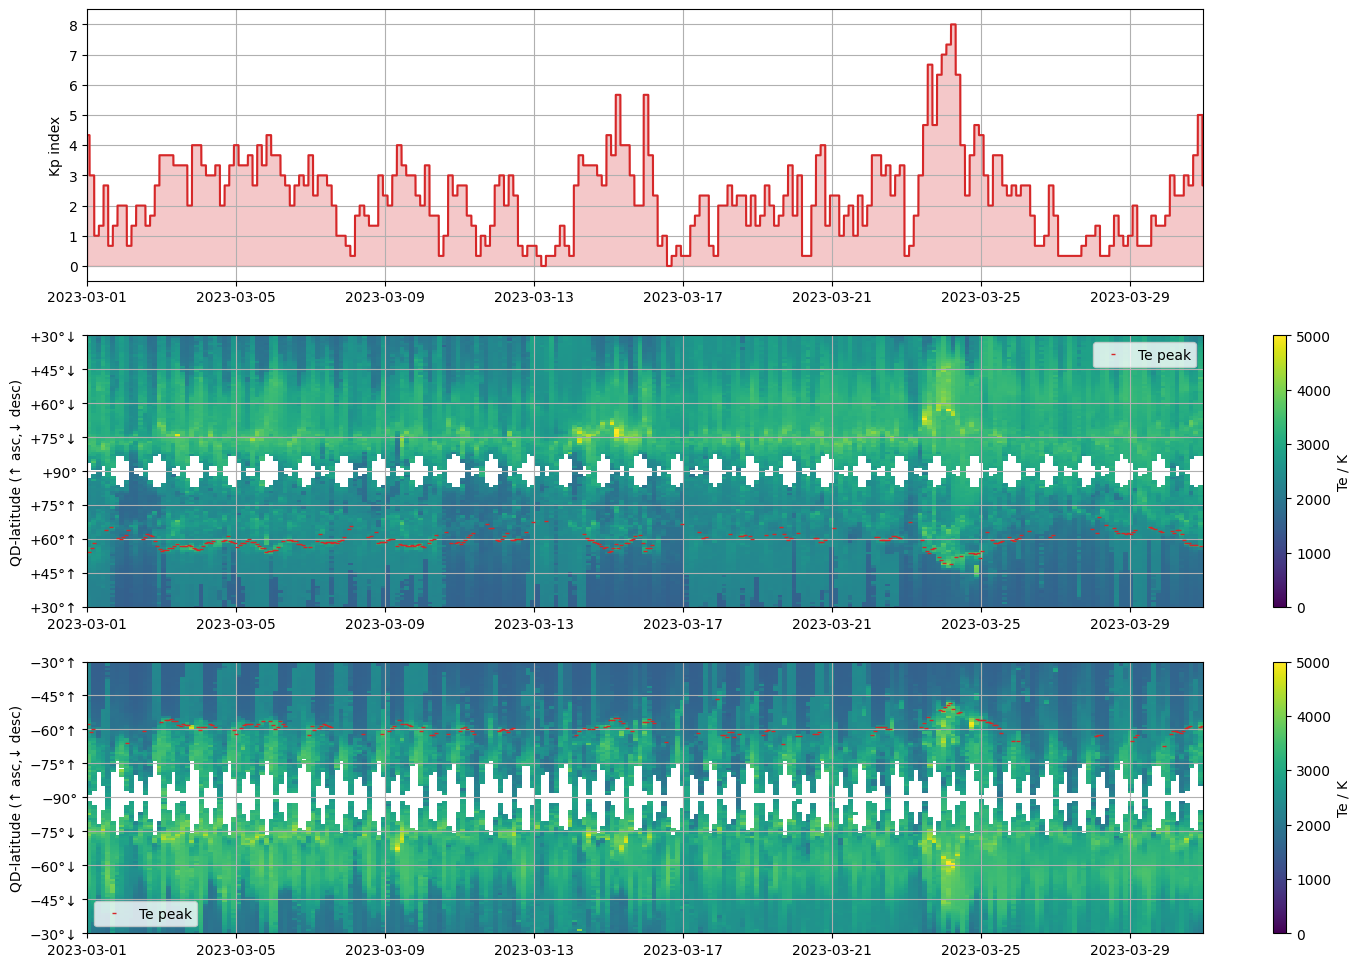

In [ ]:
def plot_te(ax, is_north=True):
    im = ax.pcolor(time_te_bin, lat_qd_orb_te_bin, values_te_bin, norm=Normalize(vmin=te_min, vmax=te_max))
    cax = colorbar(im)
    cax.set_label('Te / K')
    h_peak, = ax.plot(time_te_peak, lat_qd_te_peak, '_', c='tab:red', ms=2.5)
    ax.legend([h_peak], ["Te peak"])
    ax.grid()
    ax.set_ylabel('QD-latitude (\u2191 asc,\u2193 desc)')
    ax.set_xlim(start_time, end_time)
    _periodic_qd_plot(ax, is_north)
    return ax

# data preparation
time_te_peak = data_te_peak['Timestamp'].values
lat_qd_te_peak = _orbit_latitude(
    data_te_peak['QDLat'],
    data_te_peak['QDOrbitDirection'],
)

time_te = data_efi['Timestamp'].values
lat_qd_orb_te = _orbit_latitude(
    data_efi['QDLat'],
    data_efi['QDOrbitDirection'],
)
values_te = data_efi['Te'].values

# data binning
values_te_bin, time_te_bin, lat_qd_orb_te_bin = bin_data_2d(
    time_ne,
    lat_qd_orb_ne,
    values_te,
    tstep=parse_duration('P3H'),
    lstep=1, # deg
    statistic='median',
)

# plotting
te_min, te_max = 0, 5e3

fig = figure(figsize=(18, 12), dpi=100)

ax_kp = plot_kp(subplot(311))
ax_te_n = plot_te(subplot(312), is_north=True)
ax_te_s = plot_te(subplot(313), is_north=False)

align_axes_horizontally(ax_te_s, ax_te_n)
align_axes_horizontally(ax_kp, ax_te_n)

In [ ]:
def plot_log_ne(ax, is_north=True):
    im = ax.pcolor(time_ne_bin, lat_qd_orb_ne_bin, values_ne_bin, norm=LogNorm(vmin=ne_min, vmax=ne_max))
    cax = colorbar(im)
    cax.set_label('Ne / cm^-3')
    h_min, = ax.plot(time_ne_min, lat_qd_ne_min, '_', ='tab:red', ms=2.5)
    ax.legend([h_min], ["Ne minima"])
    ax.grid()
    ax.set_ylabel('QD-latitude (\u2191 asc,\u2193 desc)')
    ax.set_xlim(start_time, end_time)
    _periodic_qd_plot(ax, is_north)
    return ax

# data preparation
time_ne_min = data_tec['Timestamp'].values
lat_qd_ne_min = _orbit_latitude(
    data_ne_min['QDLat'],
    data_ne_min['QDOrbitDirection'],
)

time_ne = data_IPDA['Timestamp'].values
lat_qd_orb_ne = _orbit_latitude(
    data_IPDA['QDLat'],
    data_IPDA['QDOrbitDirection'],
)
values_ne = data_IPDA['mVTEC'].values

# data binning
values_ne_bin, time_ne_bin, lat_qd_orb_ne_bin = bin_data_2d(
    time_ne,
    lat_qd_orb_ne,
    values_ne,
    tstep=parse_duration('P3H'),
    lstep=1, # deg
    statistic='median',
)

# plotting
ne_min, ne_max = 1, 1e2

fig = figure(figsize=(18, 12), dpi=100)

ax_kp = plot_kp(subplot(311))
ax_ne_n = plot_log_ne(subplot(312), is_north=True)
ax_ne_s = plot_log_ne(subplot(313), is_north=False)


NameError: name 'data_tec' is not defined

In [ ]:
#...........'
SERVER_URL = "https://vires.services/ows"
START_TIME = "2023-03-02T00:00:00Z"
END_TIME = "2023-03-30T23:00:00Z"

request = SwarmRequest(SERVER_URL)
request.set_collection("SW_OPER_IPDAIRR_2F")
request.set_products(measurements=['Ne', 'mVTEC'],
                     auxiliaries=['QDLat', 'MLT', 'QDOrbitDirection'],)
data_IPDA = request.get_between(
    start_time=START_TIME,
    end_time=END_TIME,
    asynchronous=True,
)

Processing:  100%|██████████|  [ Elapsed: 00:07, Remaining: 00:00 ] [1/1] 
Downloading: 100%|██████████|  [ Elapsed: 00:07, Remaining: 00:00 ] (165.151MB)


In [ ]:
df = data_IPDA.as_dataframe()
df

Spacecraft  QDOrbitDirection      QDLat  \
Timestamp                                                               
2023-03-02 00:00:00.197000027          A                -1 -76.528770   
2023-03-02 00:00:01.197000027          A                -1 -76.576996   
2023-03-02 00:00:02.197000027          A                -1 -76.625038   
2023-03-02 00:00:03.197000027          A                -1 -76.672874   
2023-03-02 00:00:04.197000027          A                -1 -76.720535   
...                                  ...               ...        ...   
2023-03-30 22:59:55.197000027          A                 1  27.527035   
2023-03-30 22:59:56.197000027          A                 1  27.597063   
2023-03-30 22:59:57.197000027          A                 1  27.667109   
2023-03-30 22:59:58.197000027          A                 1  27.737167   
2023-03-30 22:59:59.197000027          A                 1  27.807249   

                                Longitude        Radius      mVTEC        MLT  \
Timestamp                                                                       
2023-03-02 00:00:00.197000027  159.398173  6.847278e+06  15.937971  12.885026   
2023-03-02 00:00:01.197000027  159.414553  6.847280e+06  15.890734  12.899204   
2023-03-02 00:00:02.197000027  159.431037  6.847282e+06  15.811814  12.913476   
2023-03-02 00:00:03.197000027  159.447633  6.847284e+06  15.740875  12.927845   
2023-03-02 00:00:04.197000027  159.464343  6.847286e+06  15.688164  12.942313   
...                                   ...           ...        ...        ...   
2023-03-30 22:59:55.197000027  -49.665376  6.834368e+06  23.838708  20.135864   
2023-03-30 22:59:56.197000027  -49.665835  6.834355e+06  23.782738  20.136913   
2023-03-30 22:59:57.197000027  -49.666290  6.834343e+06  23.728749  20.137959   
2023-03-30 22:59:58.197000027  -49.666741  6.834330e+06  23.670159  20.139004   
2023-03-30 22:59:59.197000027  -49.667187  6.834318e+06  23.612979  20.140049   

                                     Ne   Latitude  
Timestamp                                           
2023-03-02 00:00:00.197000027  356563.0 -67.759207  
2023-03-02 00:00:01.197000027  338867.8 -67.822503  
2023-03-02 00:00:02.197000027  339039.3 -67.885778  
2023-03-02 00:00:03.197000027  334632.4 -67.949051  
2023-03-02 00:00:04.197000027  320636.2 -68.012320  
...                                 ...        ...  
2023-03-30 22:59:55.197000027  831237.7  26.951279  
2023-03-30 22:59:56.197000027  828538.9  27.015238  
2023-03-30 22:59:57.197000027  826298.1  27.079196  
2023-03-30 22:59:58.197000027  824108.7  27.143155  
2023-03-30 22:59:59.197000027  821030.8  27.207113  

[2502000 rows x 9 columns]

<Axes: xlabel='Timestamp'>

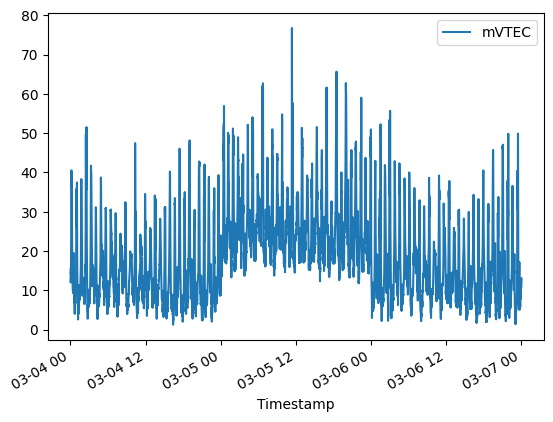

In [ ]:
import pandas as pd

start_time = pd.Timestamp('2023-03-02 01:00')
end_time = pd.Timestamp('2023-03-02 23:58')

# Filter the DataFrame based on the time range and condition
df_mor = df[(df.index >= start_time) & (df.index <= end_time) & (df['MLT'] < 13)]
df['2023-03-04':'2023-03-06'].plot(y='mVTEC')

In [ ]:
START_TIME = "2022-03-01T00:00:00Z"
END_TIME = "2022-08-30T23:00:00Z"
SERVER_URL = "https://vires.services/ows"
request = SwarmRequest(SERVER_URL)
request.set_collection("SW_OPER_IPDAIRR_2F")
request.set_products(measurements=['Ne', 'mVTEC'],
                     auxiliaries=['QDLat', 'MLT', 'QDOrbitDirection'],)
data_IPDA = request.get_between(
    start_time=START_TIME,
    end_time=END_TIME,
    asynchronous=True,
)

In [ ]:
df = data_IPDA.as_dataframe()

<Axes: xlabel='Timestamp'>

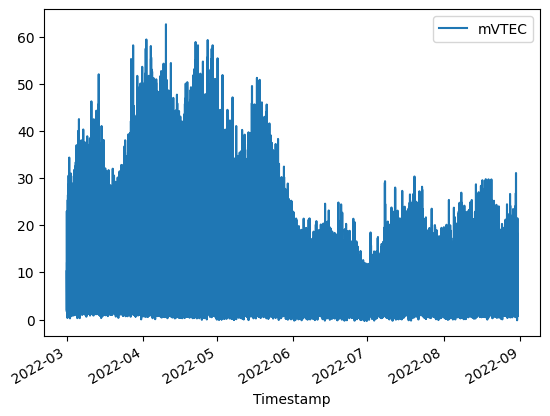

In [ ]:
df.plot(y='mVTEC')

In [ ]:
START_TIME = "2022-09-01T00:00:00Z"
END_TIME = "2023-03-30T23:00:00Z"
SERVER_URL = "https://vires.services/ows"
request = SwarmRequest(SERVER_URL)
request.set_collection("SW_OPER_IPDAIRR_2F")
request.set_products(measurements=['Ne', 'mVTEC'],
                     auxiliaries=['QDLat', 'MLT', 'QDOrbitDirection'],)
data_IPDA = request.get_between(
    start_time=START_TIME,
    end_time=END_TIME,
    asynchronous=True,
)

In [ ]:
df = data_IPDA.as_dataframe()

<Axes: xlabel='Timestamp'>

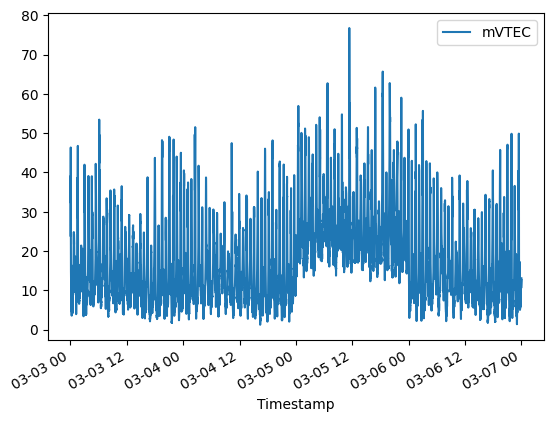

In [ ]:
df['2023-03-03':'2023-03-06'].plot(y='mVTEC')

In [ ]:
START_TIME = "2023-03-30T00:00:00Z"
END_TIME = "2023-08-30T23:00:00Z"
SERVER_URL = "https://vires.services/ows"
request = SwarmRequest(SERVER_URL)
request.set_collection("SW_OPER_IPDAIRR_2F")
request.set_products(measurements=['Ne', 'mVTEC'],
                     auxiliaries=['QDLat', 'MLT', 'QDOrbitDirection'],)
data_IPDA2 = request.get_between(
    start_time=START_TIME,
    end_time=END_TIME,
    asynchronous=True,
)

In [ ]:
df2 = data_IPDA2.as_dataframe()

<Axes: xlabel='Timestamp'>

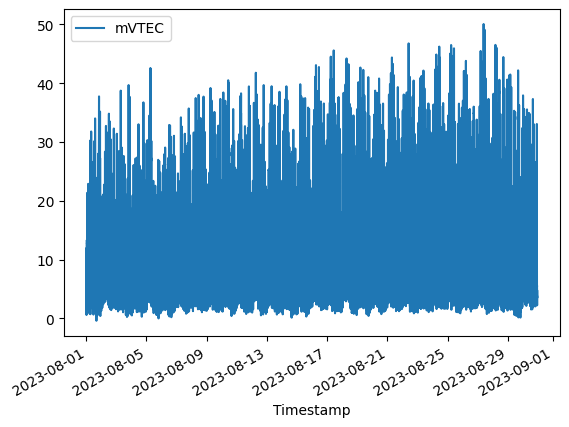

In [ ]:
df2['2023-08-01':'2023-08-31'].plot(y='mVTEC')

In [ ]:
START_TIME = "2023-09-01T00:00:00Z"
END_TIME = "2023-12-31T23:00:00Z"
SERVER_URL = "https://vires.services/ows"
request = SwarmRequest(SERVER_URL)
request.set_collection("SW_OPER_IPDAIRR_2F")
request.set_products(measurements=['Ne', 'mVTEC'],
                     auxiliaries=['QDLat', 'MLT', 'QDOrbitDirection','Dst'],)
data_IPDA3 = request.get_between(
    start_time=START_TIME,
    end_time=END_TIME,
    asynchronous=True,
)


Processing:   10%|█         |  [ Elapsed: 00:04, Remaining: 00:37 ] [2/3] 
Processing chunks [2/3]: █████     |  [ Elapsed: 00:32, Remaining: 00:32]  , (> 319.71 MB)


KeyboardInterrupt: 

In [ ]:
df3 = data_IPDA3.as_dataframe()

<Axes: xlabel='Timestamp'>

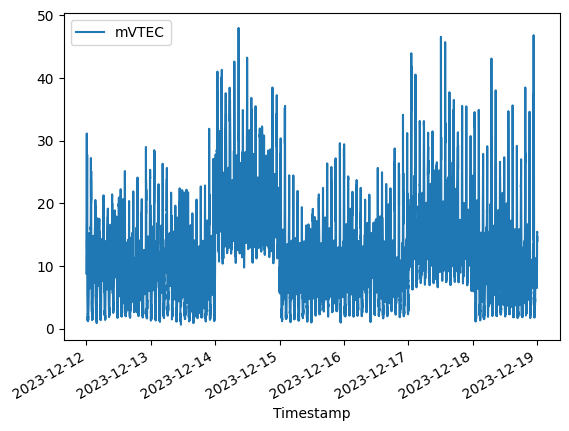

In [ ]:
df3['2023-12-12':'2023-12-18'].plot(y='mVTEC')

In [ ]:
# Test BINING
START_TIME = "2022-12-01T00:00:00Z"
END_TIME = "2023-02-28T23:00:00Z"
SERVER_URL = "https://vires.services/ows"
request = SwarmRequest(SERVER_URL)
request.set_collection("SW_OPER_IPDAIRR_2F")
request.set_products(measurements=['Ne', 'mVTEC'],
                     auxiliaries=['QDLat', 'MLT', 'QDOrbitDirection','Dst','IMF_BY_GSM','IMF_BZ_GSM'],)
data_DJF = request.get_between(
    start_time=START_TIME,
    end_time=END_TIME,
    asynchronous=True,
)
# Test BINING
START_TIME = "2023-03-01T00:00:00Z"
END_TIME = "2023-05-30T23:00:00Z"
SERVER_URL = "https://vires.services/ows"
request = SwarmRequest(SERVER_URL)
request.set_collection("SW_OPER_IPDAIRR_2F")
request.set_products(measurements=['Ne', 'mVTEC'],
                     auxiliaries=['QDLat', 'MLT', 'QDOrbitDirection','Dst','IMF_BY_GSM','IMF_BZ_GSM'],)
data_MAM = request.get_between(
    start_time=START_TIME,
    end_time=END_TIME,
    asynchronous=True,
)
# Test BINING
START_TIME = "2023-06-01T00:00:00Z"
END_TIME = "2023-08-31T23:00:00Z"
SERVER_URL = "https://vires.services/ows"
request = SwarmRequest(SERVER_URL)
request.set_collection("SW_OPER_IPDAIRR_2F")
request.set_products(measurements=['Ne', 'mVTEC'],
                     auxiliaries=['QDLat', 'MLT', 'QDOrbitDirection','Dst','IMF_BY_GSM','IMF_BZ_GSM'],)
data_JJA = request.get_between(
    start_time=START_TIME,
    end_time=END_TIME,
    asynchronous=True,
)
# Test BINING
START_TIME = "2023-09-01T00:00:00Z"
END_TIME = "2023-12-31T23:00:00Z"
SERVER_URL = "https://vires.services/ows"
request = SwarmRequest(SERVER_URL)
request.set_collection("SW_OPER_IPDAIRR_2F")
request.set_products(measurements=['Ne', 'mVTEC'],
                     auxiliaries=['QDLat', 'MLT', 'QDOrbitDirection','Dst','IMF_BY_GSM','IMF_BZ_GSM'],)
data_SON = request.get_between(
    start_time=START_TIME,
    end_time=END_TIME,
    asynchronous=True,
)

Processing chunks [1/2]:           |  [ Elapsed: 00:00, Remaining: ?]  , (> 0.0 MB)
Processing:    0%|          |  [ Elapsed: 00:00, Remaining: ? ] [1/2] 
Processing:    8%|▊         |  [ Elapsed: 00:02, Remaining: 00:29 ] [1/2] 
Processing:   22%|██▏       |  [ Elapsed: 00:04, Remaining: 00:13 ] [1/2] 
Processing:   36%|███▌      |  [ Elapsed: 00:05, Remaining: 00:09 ] [1/2] 
Processing:   50%|█████     |  [ Elapsed: 00:07, Remaining: 00:06 ] [1/2] 
Processing:   64%|██████▍   |  [ Elapsed: 00:09, Remaining: 00:04 ] [1/2] 
Processing:   80%|████████  |  [ Elapsed: 00:10, Remaining: 00:02 ] [1/2] 
Processing:   92%|█████████▏|  [ Elapsed: 00:12, Remaining: 00:01 ] [1/2] 
Processing:  100%|██████████|  [ Elapsed: 00:14, Remaining: 00:00 ] [1/2] 

Downloading:   0%|          |  [ Elapsed: 00:00, Remaining: ? ] (388.834MB)
Downloading:   0%|          |  [ Elapsed: 00:00, Remaining: 26:26 ] (388.834MB)
Downloading:   0%|          |  [ Elapsed: 00:00, Remaining: 18:51 ] (388.834MB)
Download

In [ ]:
ds_DJF = data_DJF.as_xarray()
ds_MAM = data_MAM.as_xarray()
ds_JJA = data_JJA.as_xarray()
ds_SON = data_SON.as_xarray()

In [ ]:
time_ne = ds['Timestamp'].values
lat_qd_orb_ne = _orbit_latitude(
    ds['QDLat'],
    ds['QDOrbitDirection'],
)
values_ne = ds['mVTEC'].values
# data binning
values_ne_bin, time_ne_bin, lat_qd_orb_ne_bin = bin_data_2d(
    time_ne,
    lat_qd_orb_ne,
    values_ne,
    tstep=parse_duration('P3H'),
    lstep=1, # deg
    statistic='median',
)

<ipython-input-10-7046ddec5d81>:21: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  return (asarray(data).astype(f'datetime64[{precision}]').astype('int64') - offset)*scale


In [ ]:
ds

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import xarray as xr
import matplotlib.dates as mdates
import cmcrameri.cm as cmc

# Create the figure and the scatter plot on the left side
fig, ax1 = plt.subplots(figsize=(12,6) )
scatter = ax1.scatter(ds_DJF['Timestamp'], ds_DJF['Latitude'], c=ds_DJF['mVTEC'], vmin=0, vmax=60, cmap='cmc.batlow', linewidths=0)
ax1.set_ylabel('Latitude')

# Create a twin Axes sharing the same x-axis for the line plot on the right side
ax2 = ax1.twinx()
line = ds_DJF['Dst'].plot.line(ax=ax2, color='tab:red',  linewidth=0.5 )
#ds_DJF['IMF_BY_GSM'].plot.line(ax=ax2, color='g')
#ds_DJF['IMF_BZ_GSM'].plot.line(ax=ax2, color='k')
ax2.set_ylabel('Dst')

# Set the right tick labels to red
ax2.tick_params(axis='y', colors='red')
# Set x-axis formatter to ConciseDateFormatter with specified locator
ax1.xaxis.set_major_locator(mdates.AutoDateLocator())
ax1.xaxis.set_major_formatter(mdates.ConciseDateFormatter(mdates.AutoDateLocator()))

# Add color bar
cbar = plt.colorbar(scatter, ax=ax1, orientation='horizontal')
cbar.set_label('VTEC [TECU]')

# Show the plot
plt.show()

ModuleNotFoundError: No module named 'cmcrameri'

In [ ]:
!python -m pip install cmcrameri

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import xarray as xr
import matplotlib.dates as mdates
import cmcrameri.cm as cmc

# Create the figure and define the gridspec layout
fig, axs = plt.subplots(4, 1, figsize=(12, 8))

# Scatter plot on the first row
scatter = axs[0].scatter(ds_DJF['Timestamp'], ds_DJF['Latitude'], c=ds_DJF['mVTEC'], vmin=0, vmax=60, cmap='cmc.batlow', linewidths=0)
axs[0].set_ylabel('Latitude')

# Twin axis for the line plot on the second row
ax2 = axs[0].twinx()
ax2.plot(ds_DJF['Timestamp'], ds_DJF['Dst'], color='tab:red',  linewidth=0.5 )
ax2.set_ylabel('Dst')

# Set the right tick labels to red
ax2.tick_params(axis='y', colors='red')
#----------------------------
# Scatter plot on the first row
scatter = axs[1].scatter(ds_MAM['Timestamp'], ds_MAM['Latitude'], c=ds_MAM['mVTEC'], vmin=0, vmax=60, cmap='cmc.batlow', linewidths=0)
axs[1].set_ylabel('Latitude')

# Twin axis for the line plot on the second row
ax2 = axs[1].twinx()
ax2.plot(ds_MAM['Timestamp'], ds_MAM['Dst'], color='tab:red',  linewidth=0.5 )
ax2.set_ylabel('Dst')

# Set the right tick labels to red
ax2.tick_params(axis='y', colors='red')
#-------------------------------
# Scatter plot on the first row
scatter = axs[3].scatter(ds_JJA['Timestamp'], ds_JJA['Latitude'], c=ds_JJA['mVTEC'], vmin=0, vmax=60, cmap='cmc.batlow', linewidths=0)
axs[3].set_ylabel('Latitude')

# Twin axis for the line plot on the second row
ax2 = axs[3].twinx()
ax2.plot(ds_JJA['Timestamp'], ds_JJA['Dst'], color='tab:red',  linewidth=0.5 )
ax2.set_ylabel('Dst')

# Set the right tick labels to red
ax2.tick_params(axis='y', colors='red')
#-------------------------------
# Scatter plot on the first row
scatter = axs[2].scatter(ds_SON['Timestamp'], ds_SON['Latitude'], c=ds_SON['mVTEC'], vmin=0, vmax=60, cmap='cmc.batlow', linewidths=0)
axs[2].set_ylabel('Latitude')

# Twin axis for the line plot on the second row
ax2 = axs[2].twinx()
ax2.plot(ds_SON['Timestamp'], ds_SON['Dst'], color='tab:red',  linewidth=0.5 )
ax2.set_ylabel('Dst')

# Set the right tick labels to red
ax2.tick_params(axis='y', colors='red')
#-------------------------------
# Color bar on the third row
cbar = plt.colorbar(scatter, ax=axs[3], orientation='horizontal', extend='both', aspect=50)
cbar.set_label('VTEC [TECU]')
# Set x-axis formatter to ConciseDateFormatter with specified locator for all subplots
for ax in axs:
    ax.xaxis.set_major_locator(mdates.AutoDateLocator())
    ax.xaxis.set_major_formatter(mdates.ConciseDateFormatter(mdates.AutoDateLocator()))

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot



In [ ]:

df['smoothed_value'] = df['value'].rolling(window=3).mean()